In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier


In [2]:
df=pd.read_csv('file:///C:/Users/SR%20COMPUTER/Downloads/Compressed/Financial%20Distress.csv')
df.head()

Company  Time  Financial Distress      x1        x2       x3       x4  \
0        1     1            0.010636  1.2810  0.022934  0.87454  1.21640   
1        1     2           -0.455970  1.2700  0.006454  0.82067  1.00490   
2        1     3           -0.325390  1.0529 -0.059379  0.92242  0.72926   
3        1     4           -0.566570  1.1131 -0.015229  0.85888  0.80974   
4        2     1            1.357300  1.0623  0.107020  0.81460  0.83593   

         x5        x6       x7  ...      x74    x75     x76     x77   x78  \
0  0.060940  0.188270  0.52510  ...   85.437  27.07  26.102  16.000  16.0   
1 -0.014080  0.181040  0.62288  ...  107.090  31.31  30.194  17.000  16.0   
2  0.020476  0.044865  0.43292  ...  120.870  36.07  35.273  17.000  15.0   
3  0.076037  0.091033  0.67546  ...   54.806  39.80  38.377  17.167  16.0   
4  0.199960  0.047800  0.74200  ...   85.437  27.07  26.102  16.000  16.0   

   x79  x80       x81  x82  x83  
0  0.2   22  0.060390   30   49  
1  0.4   22  0.010636   31   50  
2 -0.2   22 -0.455970   32   51  
3  5.6   22 -0.325390   33   52  
4  0.2   29  1.251000    7   27  

[5 rows x 86 columns]

In [3]:
df.shape

(3672, 86)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 86 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             3672 non-null   int64  
 1   Time                3672 non-null   int64  
 2   Financial Distress  3672 non-null   float64
 3   x1                  3672 non-null   float64
 4   x2                  3672 non-null   float64
 5   x3                  3672 non-null   float64
 6   x4                  3672 non-null   float64
 7   x5                  3672 non-null   float64
 8   x6                  3672 non-null   float64
 9   x7                  3672 non-null   float64
 10  x8                  3672 non-null   float64
 11  x9                  3672 non-null   float64
 12  x10                 3672 non-null   float64
 13  x11                 3672 non-null   float64
 14  x12                 3672 non-null   float64
 15  x13                 3672 non-null   float64
 16  x14   

In [5]:
df.describe()

Company         Time  Financial Distress           x1           x2  \
count  3672.000000  3672.000000         3672.000000  3672.000000  3672.000000   
mean    182.084423     7.528322            1.040257     1.387820     0.129706   
std     117.024636     4.064016            2.652227     1.452926     0.120013   
min       1.000000     1.000000           -8.631700     0.075170    -0.258080   
25%      80.000000     4.000000            0.172275     0.952145     0.048701   
50%     168.000000     7.000000            0.583805     1.183600     0.107530   
75%     264.250000    11.000000            1.351750     1.506475     0.188685   
max     422.000000    14.000000          128.400000    51.954000     0.749410   

                x3            x4           x5           x6           x7  ...  \
count  3672.000000  3.672000e+03  3672.000000  3672.000000  3672.000000  ...   
mean      0.615769  8.681599e-01     0.154949     0.106717     0.784031  ...   
std       0.177904  5.719519e-01     0.124904     0.210555     1.033606  ...   
min       0.016135  5.350000e-07    -0.269790    -0.627750     0.035160  ...   
25%       0.501888  5.525575e-01     0.070001    -0.027754     0.436003  ...   
50%       0.638690  7.752450e-01     0.131830     0.104325     0.641875  ...   
75%       0.749425  1.039000e+00     0.219570     0.231230     0.896773  ...   
max       0.967900  6.835600e+00     0.858540     0.929550    38.836000  ...   

               x74          x75          x76          x77          x78  \
count  3672.000000  3672.000000  3672.000000  3672.000000  3672.000000   
mean     86.839822    91.920506    89.115908    17.780855    15.198708   
std      16.706209    64.656504    64.349382     2.040152     2.828648   
min      54.806000    24.318000    23.776000    15.250000    12.000000   
25%      79.951000    39.800000    38.377000    16.000000    13.000000   
50%      90.000000    66.120000    59.471000    17.000000    14.500000   
75%      93.883000   130.500000   132.400000    20.000000    16.000000   
max     120.870000   227.500000   214.500000    22.000000    22.000000   

               x79          x80          x81          x82          x83  
count  3672.000000  3672.000000  3672.000000  3672.000000  3672.000000  
mean     -2.664305    19.714597     1.100488    13.122277    33.044935  
std       8.192663     7.508588     2.666733     9.465907    13.714563  
min     -20.200000     1.000000    -0.499220     1.000000     2.000000  
25%      -7.000000    14.000000     0.189912     6.000000    21.000000  
50%       0.200000    20.000000     0.594765    11.000000    34.000000  
75%       2.100000    26.000000     1.355050    17.000000    44.000000  
max       8.600000    37.000000   128.400000    49.000000    74.000000  

[8 rows x 86 columns]

In [6]:
df.corr().describe().T

count      mean       std       min       25%       50%  \
Company              86.0  0.007936  0.142298 -0.356825 -0.038985  0.005672   
Time                 86.0  0.037484  0.308365 -0.884338 -0.042745  0.026622   
Financial Distress   86.0  0.058918  0.159932 -0.173126 -0.012860  0.014836   
x1                   86.0  0.067153  0.233171 -0.440321 -0.044647  0.010485   
x2                   86.0  0.092278  0.282619 -0.638515 -0.021295  0.019764   
...                   ...       ...       ...       ...       ...       ...   
x79                  86.0  0.005084  0.210672 -0.941285 -0.070915 -0.020713   
x80                  86.0  0.027435  0.119407 -0.179525 -0.010909  0.017098   
x81                  86.0  0.082579  0.204762 -0.164259 -0.008950  0.023180   
x82                  86.0 -0.003060  0.154154 -0.356825 -0.066578 -0.020544   
x83                  86.0  0.005827  0.146076 -0.321318 -0.048603 -0.007820   

                         75%  max  
Company             0.039308  1.0  
Time                0.095727  1.0  
Financial Distress  0.112241  1.0  
x1                  0.107580  1.0  
x2                  0.170980  1.0  
...                      ...  ...  
x79                 0.021720  1.0  
x80                 0.044937  1.0  
x81                 0.138703  1.0  
x82                 0.018150  1.0  
x83                 0.029088  1.0  

[86 rows x 8 columns]

<AxesSubplot:>

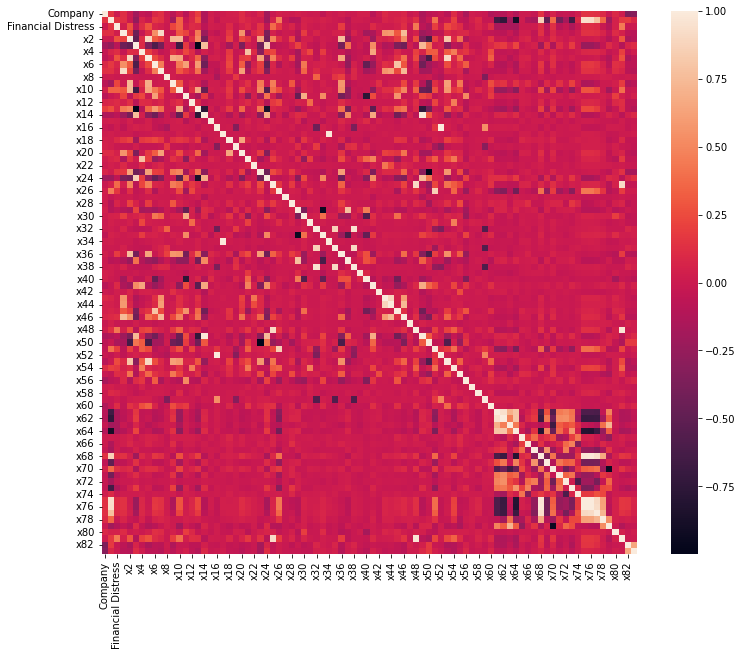

In [7]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr())

In [8]:
df.max()

Company               422.00000
Time                   14.00000
Financial Distress    128.40000
x1                     51.95400
x2                      0.74941
                        ...    
x79                     8.60000
x80                    37.00000
x81                   128.40000
x82                    49.00000
x83                    74.00000
Length: 86, dtype: float64

In [9]:
df.min()

Company                1.00000
Time                   1.00000
Financial Distress    -8.63170
x1                     0.07517
x2                    -0.25808
                        ...   
x79                  -20.20000
x80                    1.00000
x81                   -0.49922
x82                    1.00000
x83                    2.00000
Length: 86, dtype: float64

In [10]:
df.mean()

Company               182.084423
Time                    7.528322
Financial Distress      1.040257
x1                      1.387820
x2                      0.129706
                         ...    
x79                    -2.664305
x80                    19.714597
x81                     1.100488
x82                    13.122277
x83                    33.044935
Length: 86, dtype: float64

In [11]:
[features for features in df.columns if df[features].isnull().sum()>0]

[]

In [12]:
for i  in df.columns:
    print(f'unique values in column "{i}" is\n {df[i].value_counts()}')
    print('-------------------------------------------------')

unique values in column "Company" is
 328    14
262    14
360    14
94     14
95     14
       ..
288     1
158     1
344     1
162     1
300     1
Name: Company, Length: 422, dtype: int64
-------------------------------------------------
unique values in column "Time" is
 14    280
3     277
4     274
13    274
2     271
12    270
5     266
6     263
11    259
7     257
10    249
8     245
9     245
1     242
Name: Time, dtype: int64
-------------------------------------------------
unique values in column "Financial Distress" is
 0.00000    12
1.65750     2
1.33250     2
1.22410     2
1.20890     2
           ..
0.32346     1
0.45669     1
0.37549     1
0.45768     1
0.51865     1
Name: Financial Distress, Length: 3610, dtype: int64
-------------------------------------------------
unique values in column "x1" is
 1.17870    5
1.30850    4
1.15220    4
1.04040    4
1.05290    4
          ..
1.00490    1
0.95111    1
1.40050    1
1.22100    1
1.61480    1
Name: x1, Length: 3357, dtype

Name: x63, Length: 119, dtype: int64
-------------------------------------------------
unique values in column "x64" is
 -20.2290    222
-4.5408     220
 5.8267     219
-17.8990    216
 5.7748     214
           ... 
-17.3750      1
-19.0700      1
-8.9935       1
-15.0000      1
-13.6920      1
Name: x64, Length: 119, dtype: int64
-------------------------------------------------
unique values in column "x65" is
  28.2860     222
-20.8610     220
 2.6566      219
 107.7100    216
-20.9820     214
            ... 
 34.9650       1
 87.4230       1
 21.9970       1
 11.9030       1
 7.8078        1
Name: x65, Length: 119, dtype: int64
-------------------------------------------------
unique values in column "x66" is
 30.023    222
22.334    220
27.729    219
38.823    216
15.916    214
         ... 
26.741      1
35.897      1
27.830      1
27.460      1
26.819      1
Name: x66, Length: 119, dtype: int64
-------------------------------------------------
unique values in column "x67" is


In [13]:
object_col=[]
num_col=[]
for i in df.columns:
    if df[i].dtype=='object':
        object_col.append(i)
    else:
        num_col.append(i)

In [14]:
object_col

[]

In [15]:
num_col

['Company',
 'Time',
 'Financial Distress',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19',
 'x20',
 'x21',
 'x22',
 'x23',
 'x24',
 'x25',
 'x26',
 'x27',
 'x28',
 'x29',
 'x30',
 'x31',
 'x32',
 'x33',
 'x34',
 'x35',
 'x36',
 'x37',
 'x38',
 'x39',
 'x40',
 'x41',
 'x42',
 'x43',
 'x44',
 'x45',
 'x46',
 'x47',
 'x48',
 'x49',
 'x50',
 'x51',
 'x52',
 'x53',
 'x54',
 'x55',
 'x56',
 'x57',
 'x58',
 'x59',
 'x60',
 'x61',
 'x62',
 'x63',
 'x64',
 'x65',
 'x66',
 'x67',
 'x68',
 'x69',
 'x70',
 'x71',
 'x72',
 'x73',
 'x74',
 'x75',
 'x76',
 'x77',
 'x78',
 'x79',
 'x80',
 'x81',
 'x82',
 'x83']

In [16]:
df.skew()

Company                0.350358
Time                   0.016950
Financial Distress    30.873600
x1                    20.058157
x2                     1.026241
                        ...    
x79                   -0.732060
x80                   -0.256838
x81                   31.234347
x82                    1.156911
x83                   -0.023812
Length: 86, dtype: float64

In [17]:
import dtale
dtale.show(df)

In [18]:
df.columns

Index(['Company', 'Time', 'Financial Distress', 'x1', 'x2', 'x3', 'x4', 'x5',
       'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16',
       'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26',
       'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36',
       'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46',
       'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56',
       'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66',
       'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76',
       'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83'],
      dtype='object')

In [19]:
df.isnull().sum()

Company               0
Time                  0
Financial Distress    0
x1                    0
x2                    0
                     ..
x79                   0
x80                   0
x81                   0
x82                   0
x83                   0
Length: 86, dtype: int64

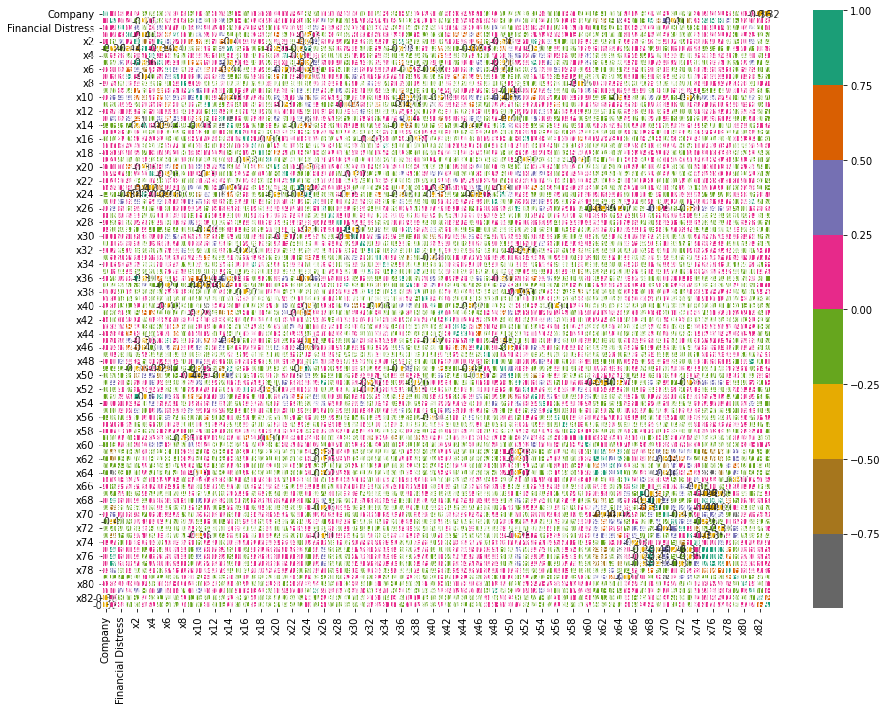

In [20]:
plt.figure(figsize=(15,11))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

In [21]:
df.columns

Index(['Company', 'Time', 'Financial Distress', 'x1', 'x2', 'x3', 'x4', 'x5',
       'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16',
       'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26',
       'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36',
       'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46',
       'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56',
       'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66',
       'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76',
       'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83'],
      dtype='object')

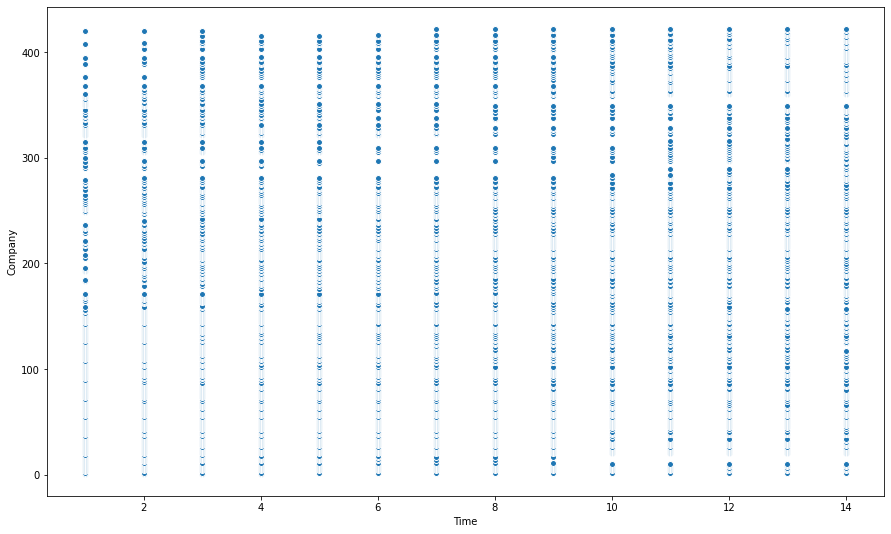

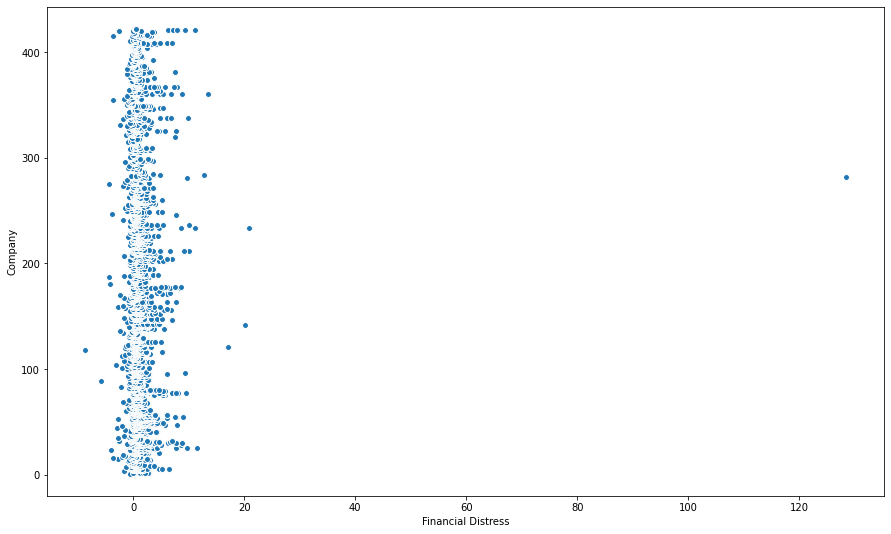

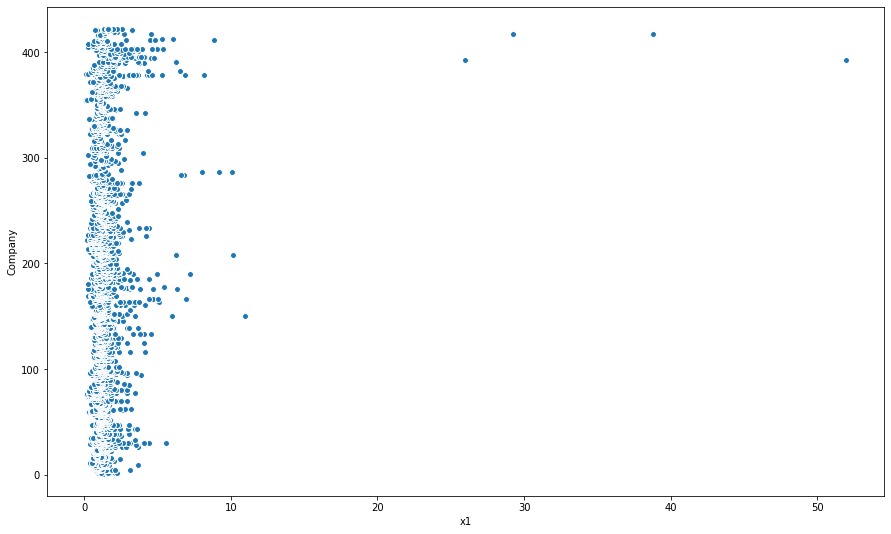

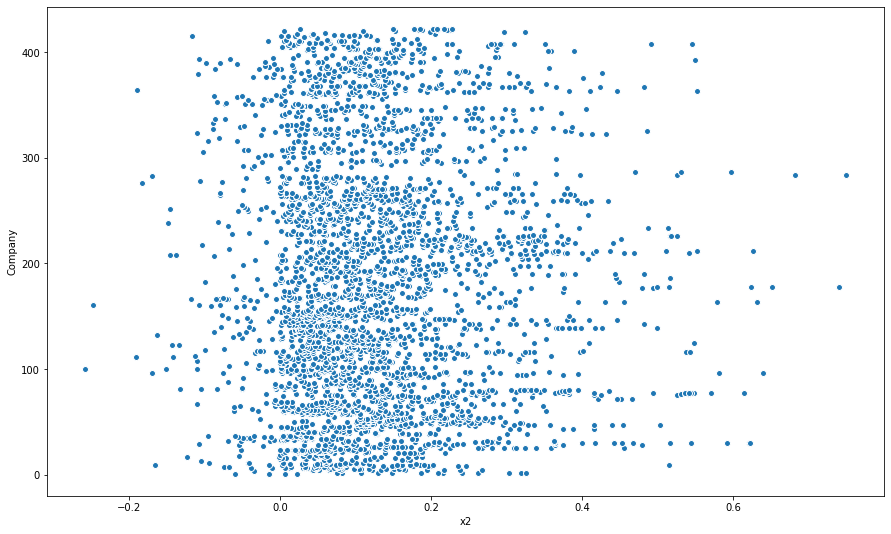

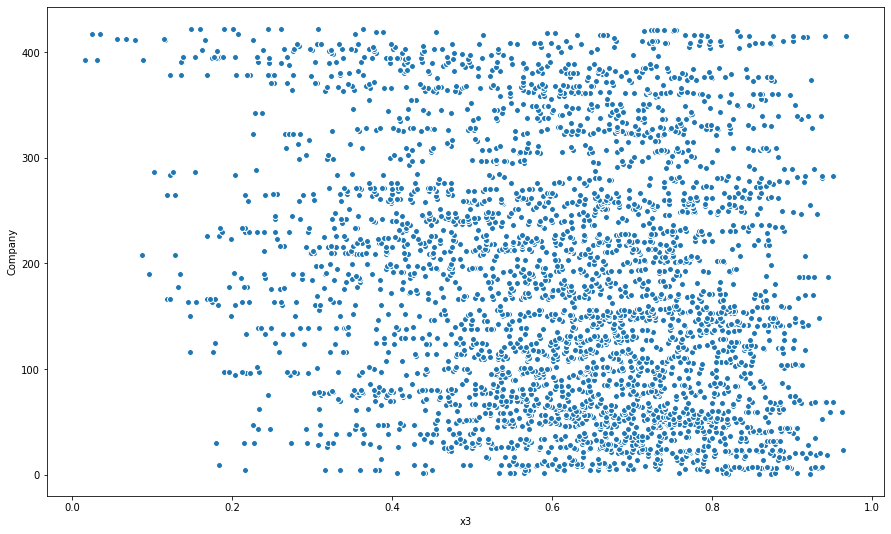

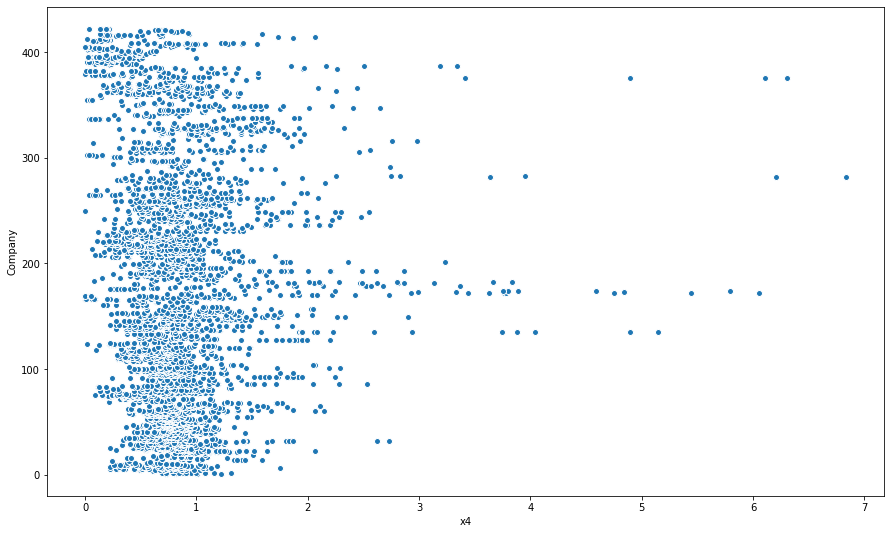

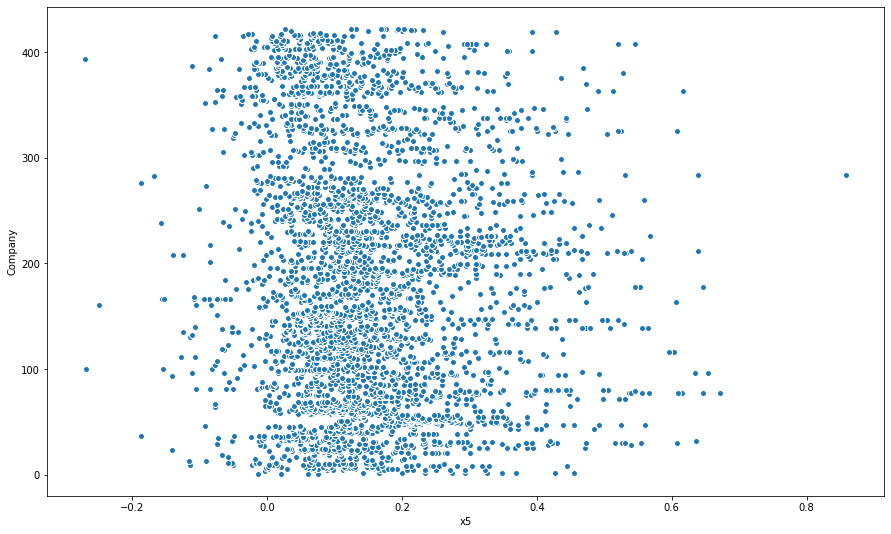

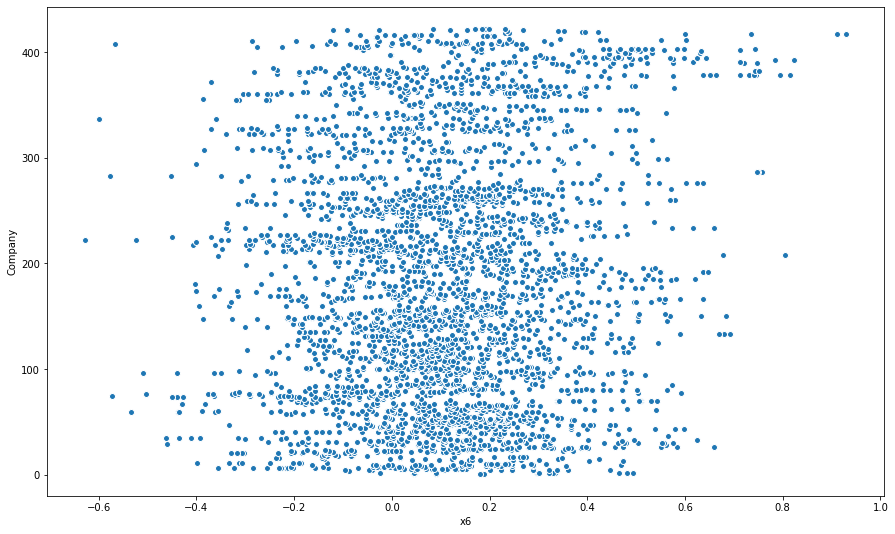

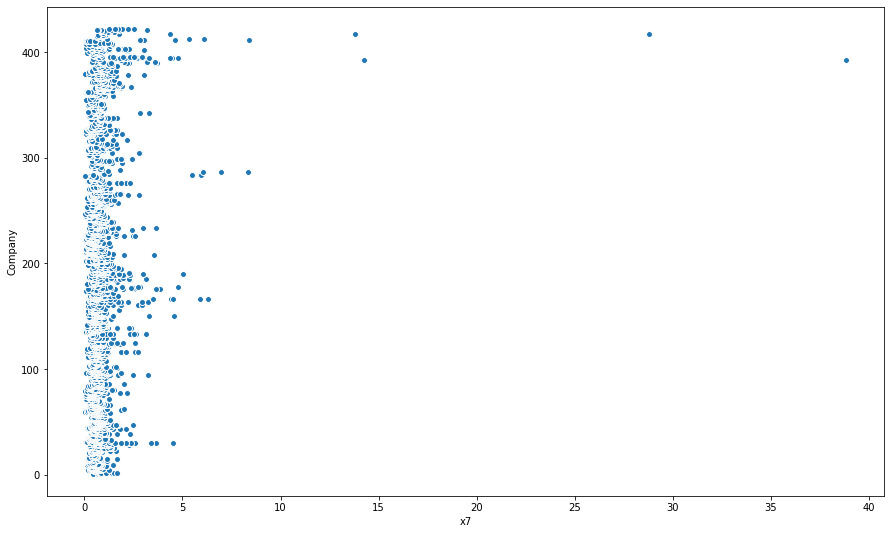

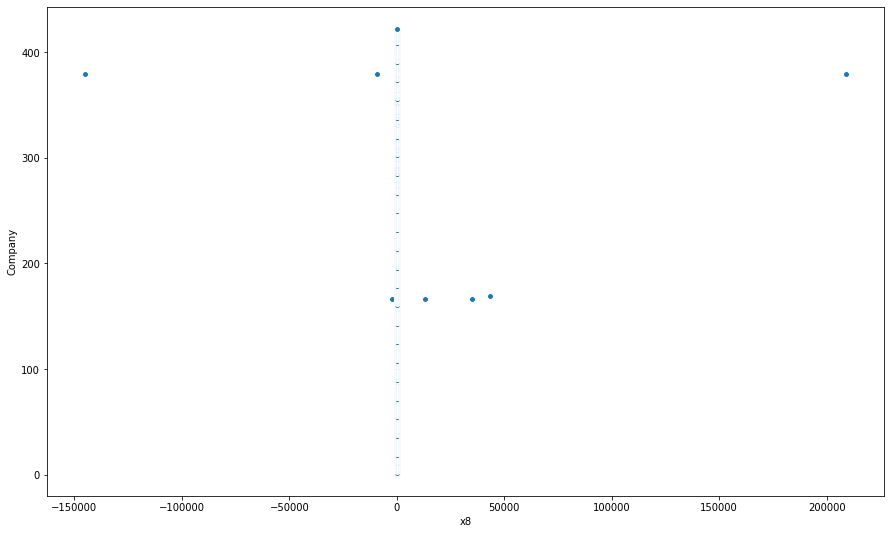

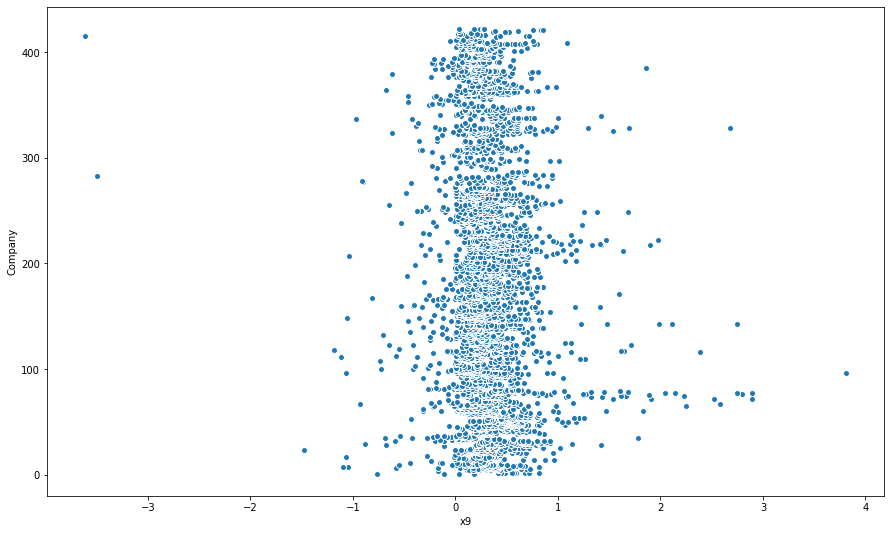

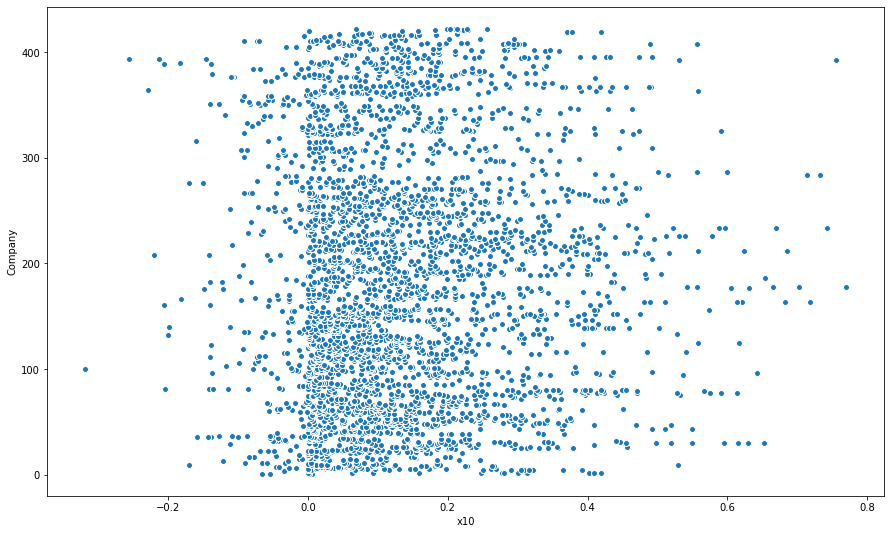

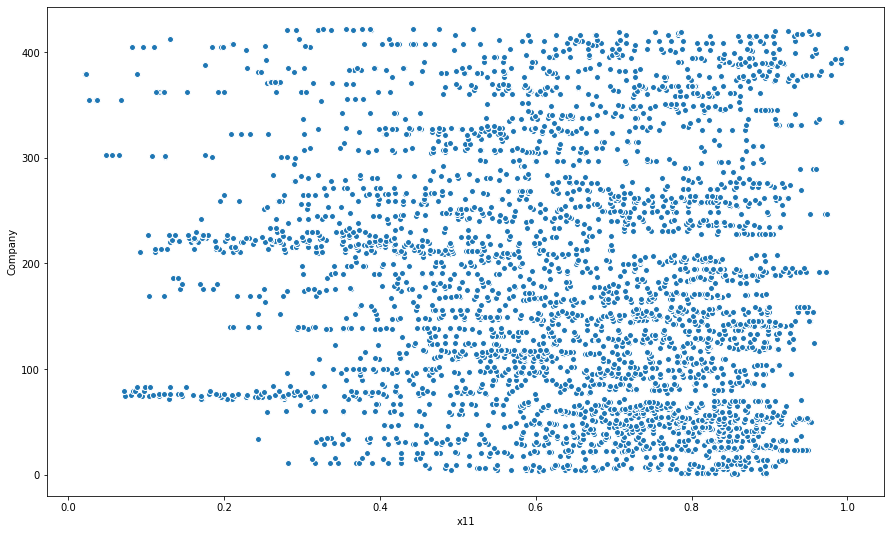

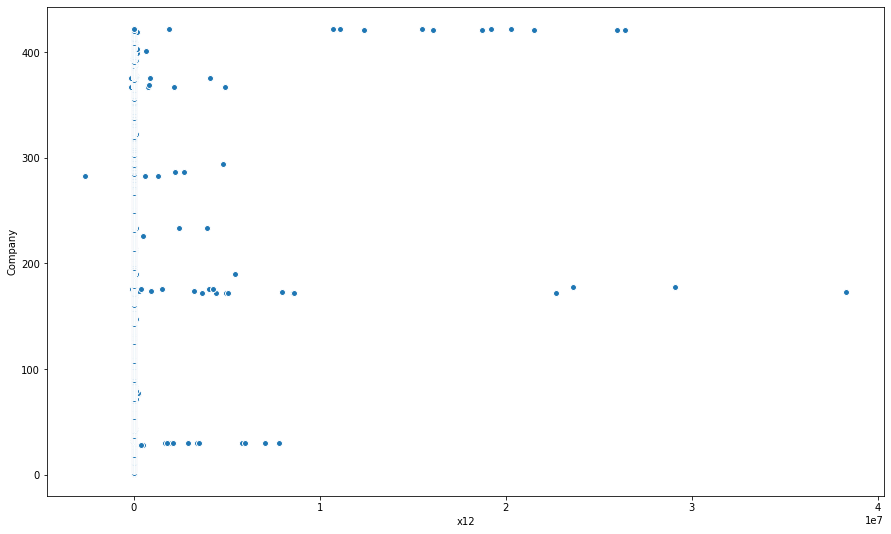

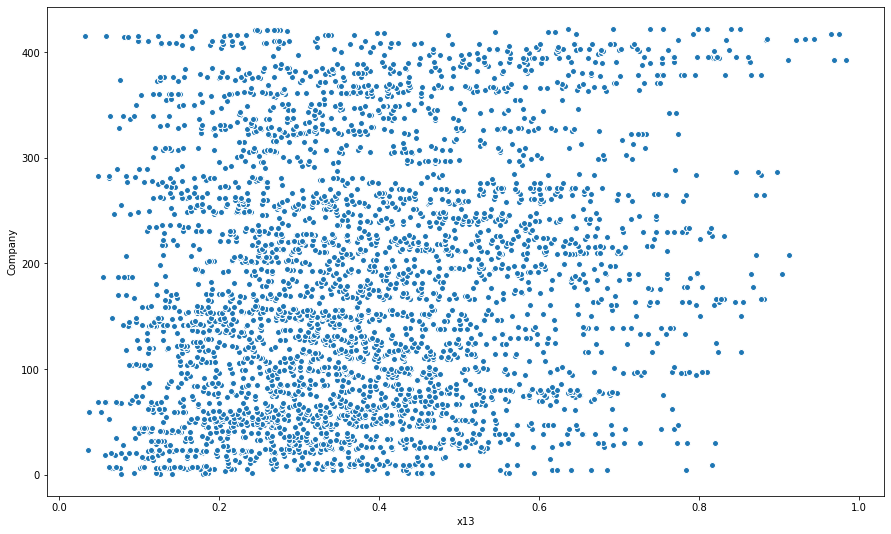

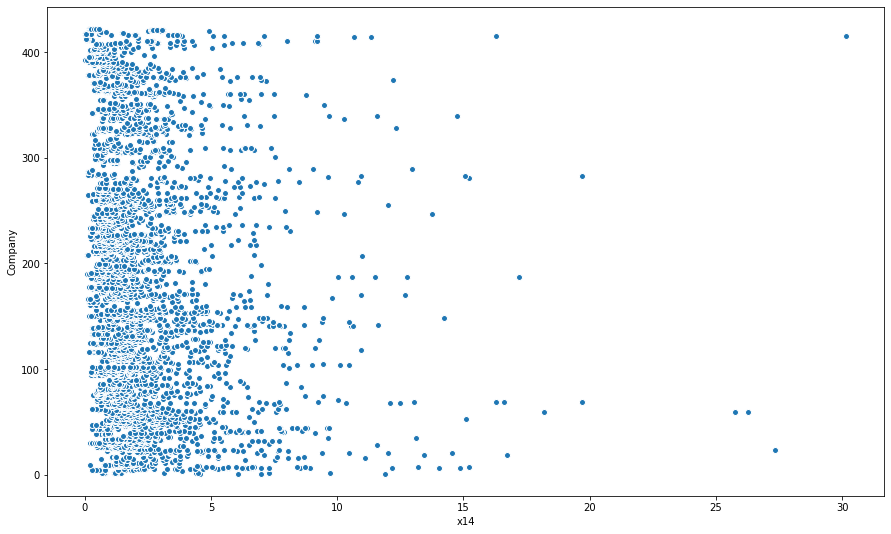

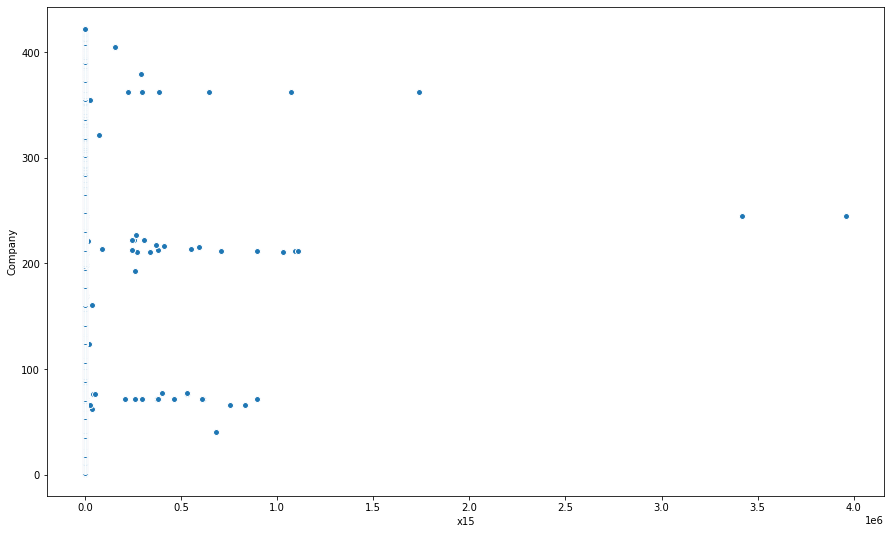

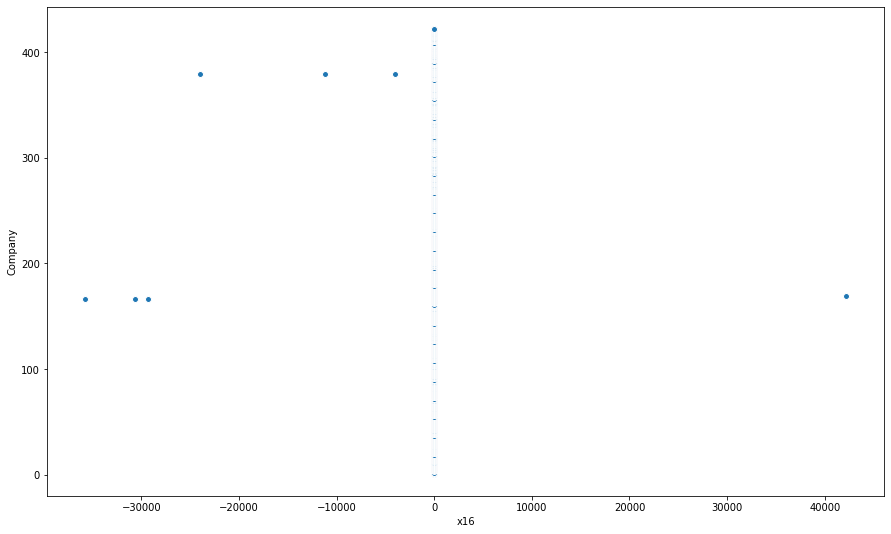

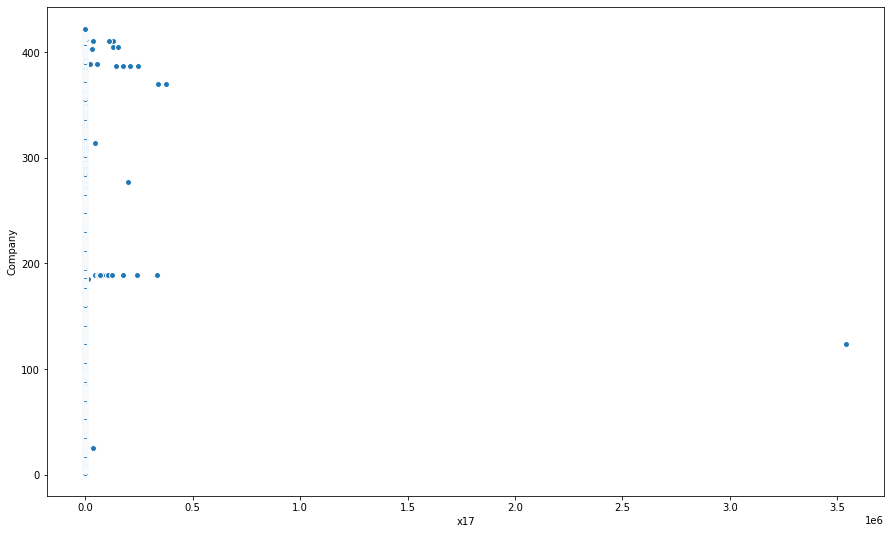

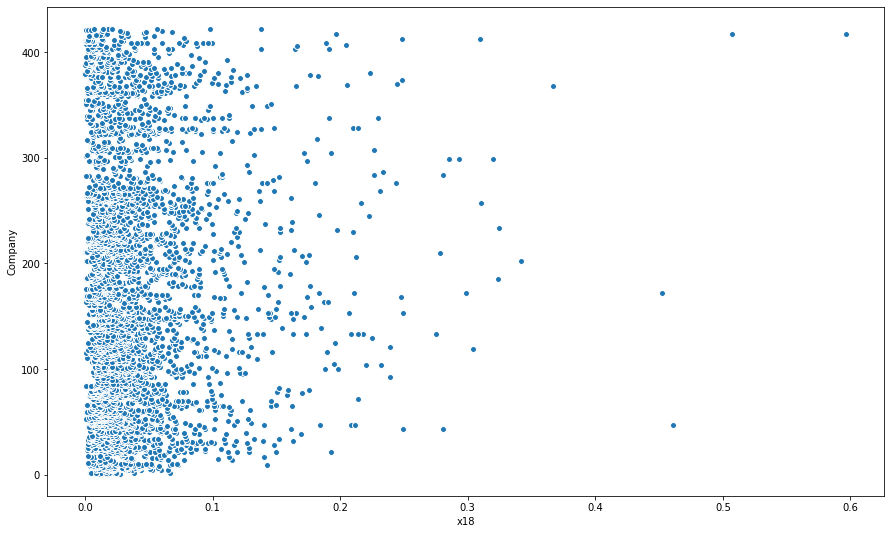

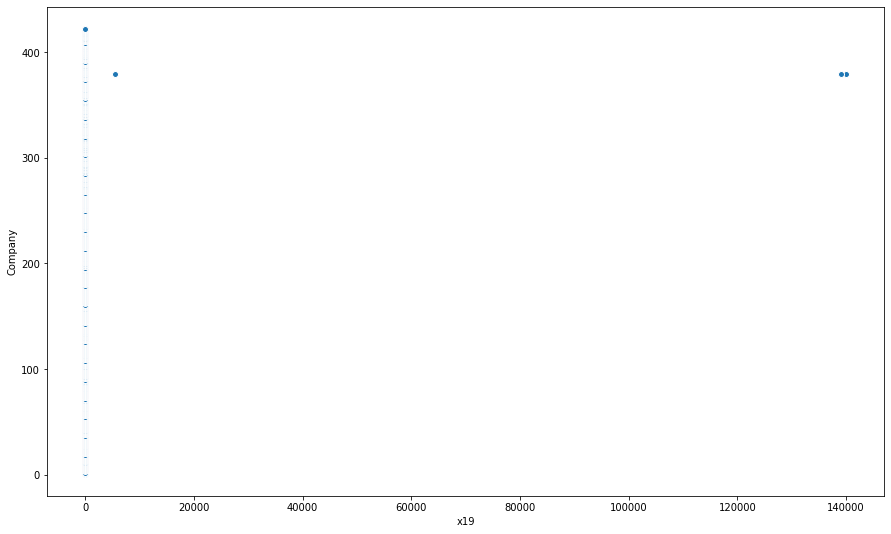

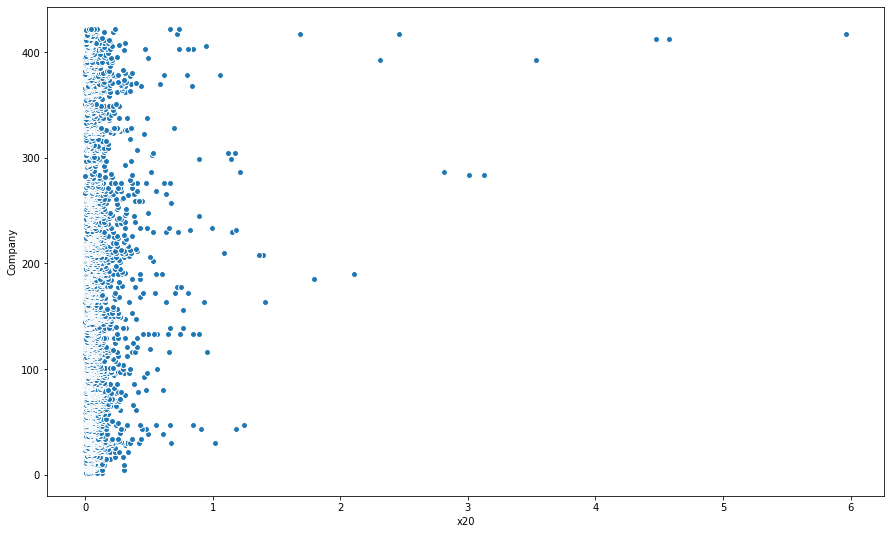

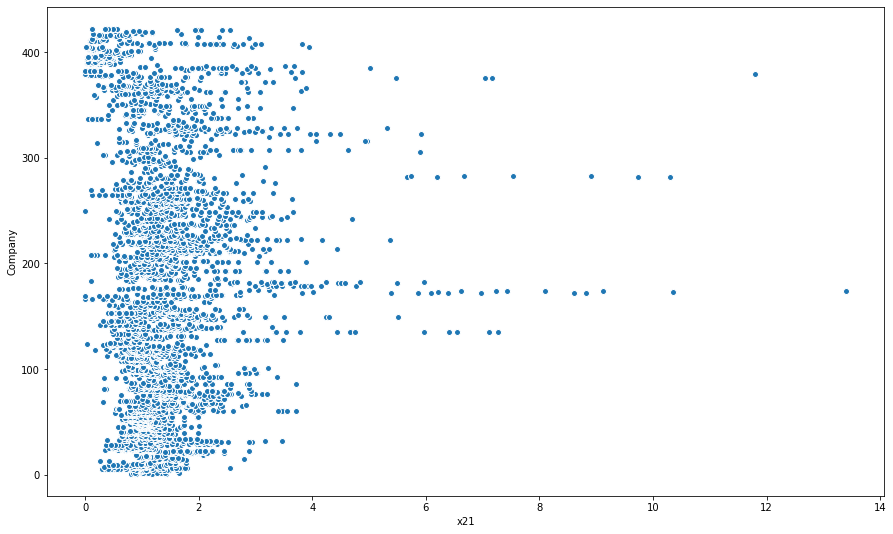

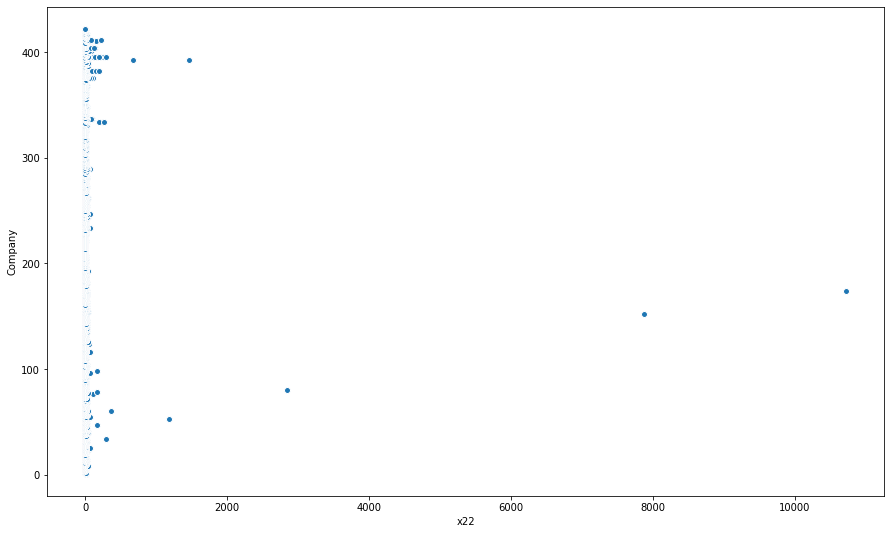

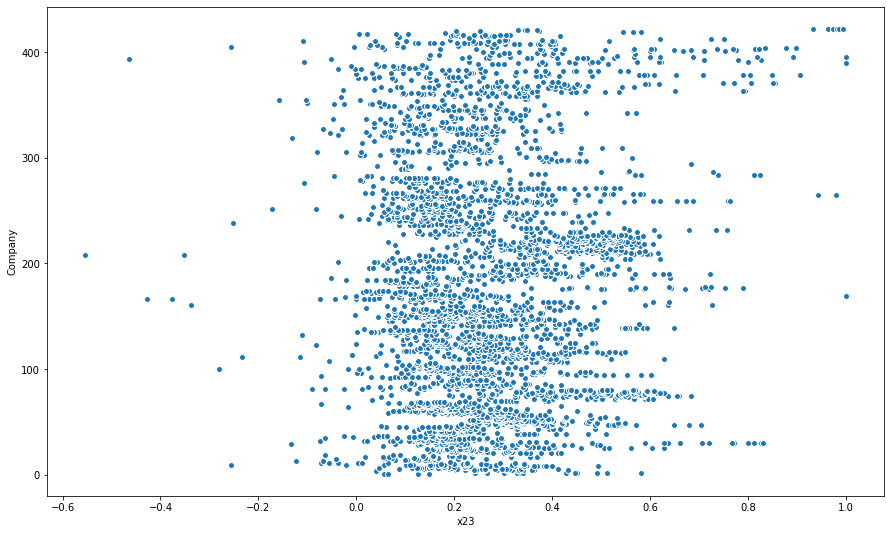

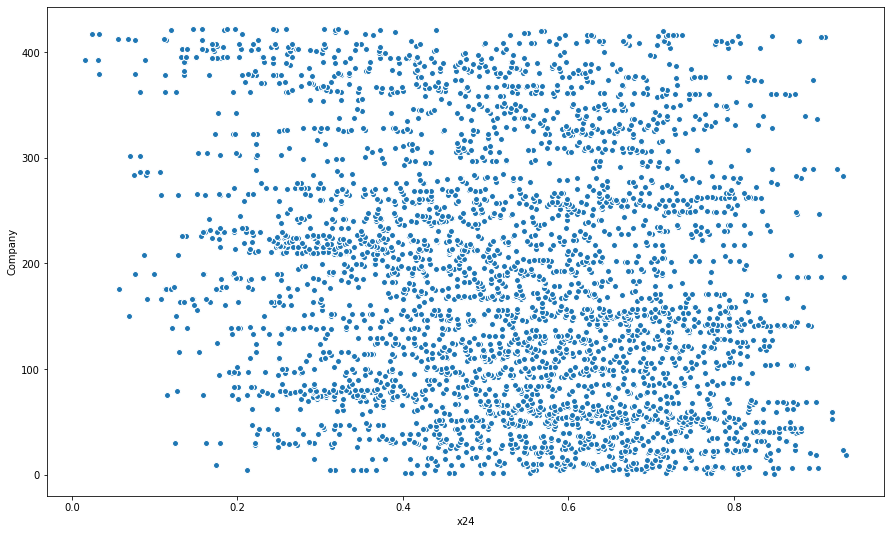

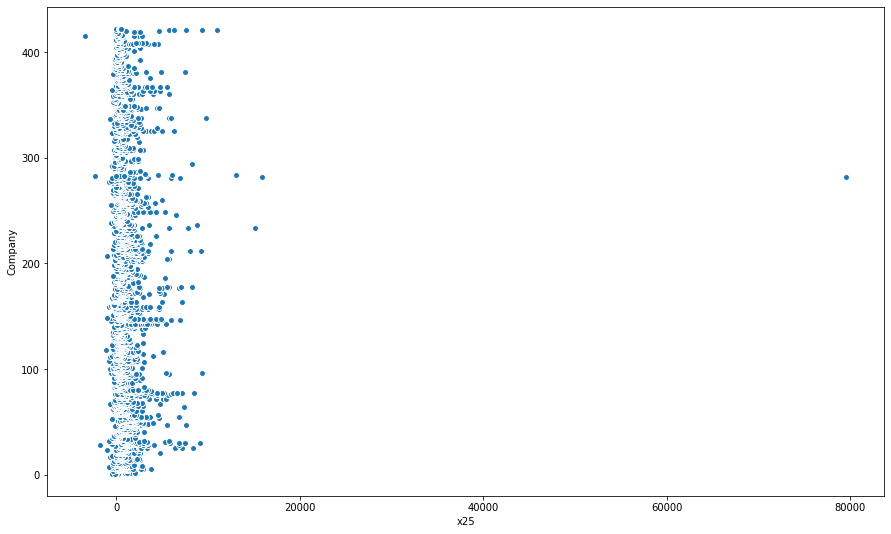

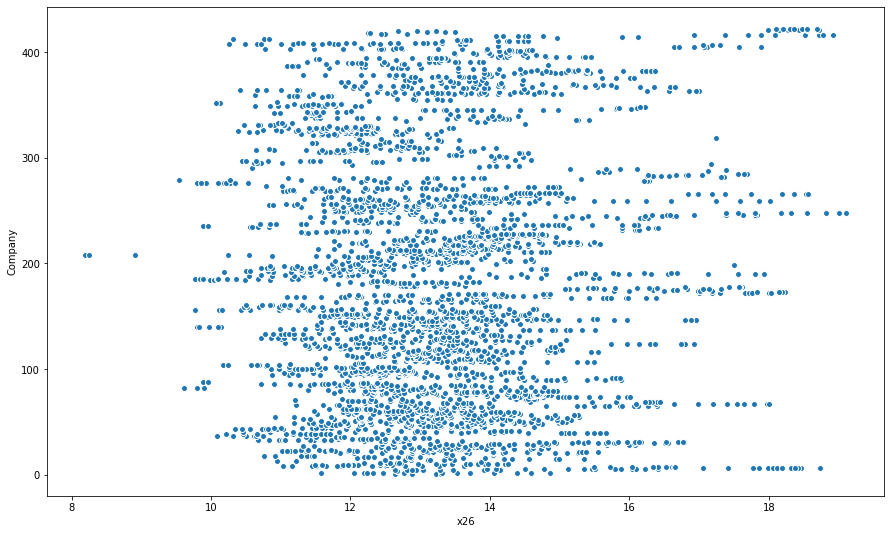

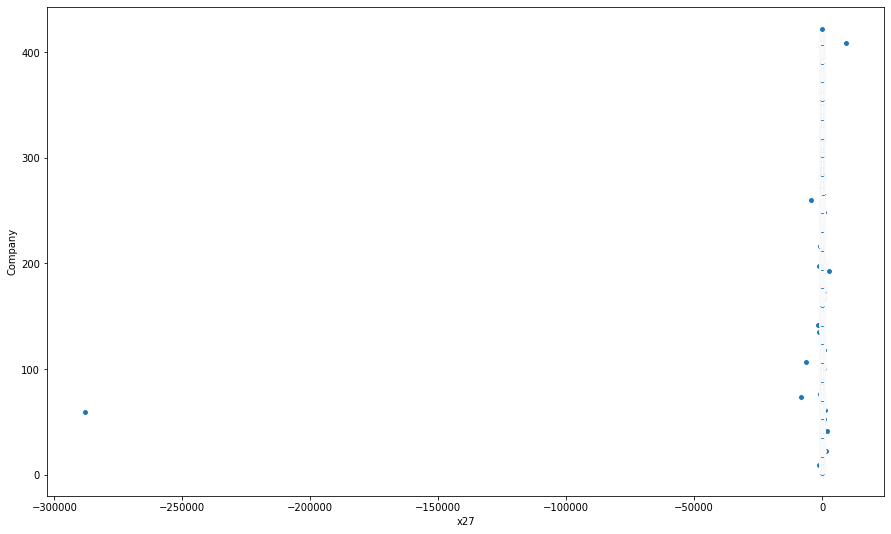

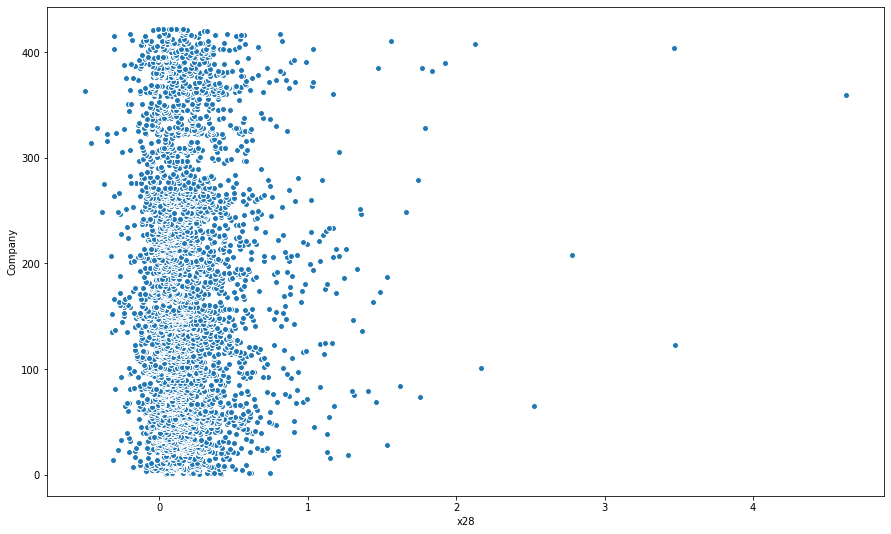

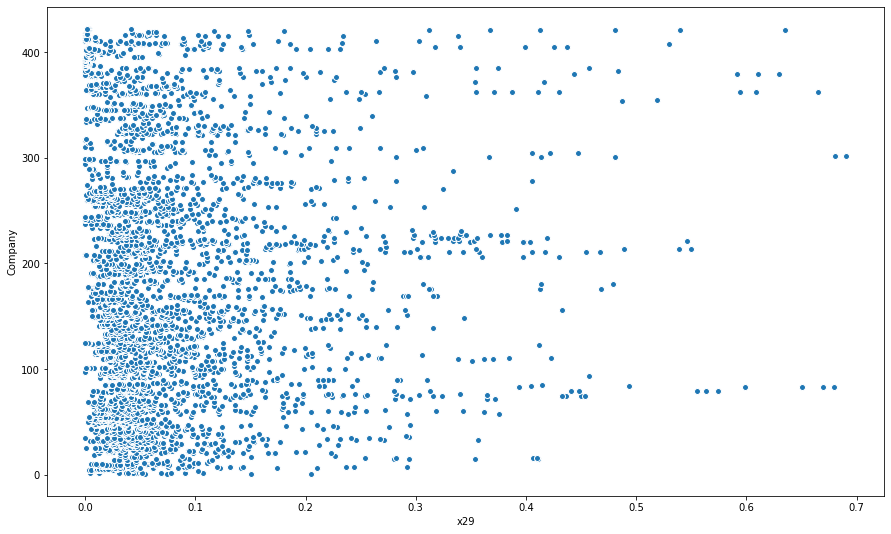

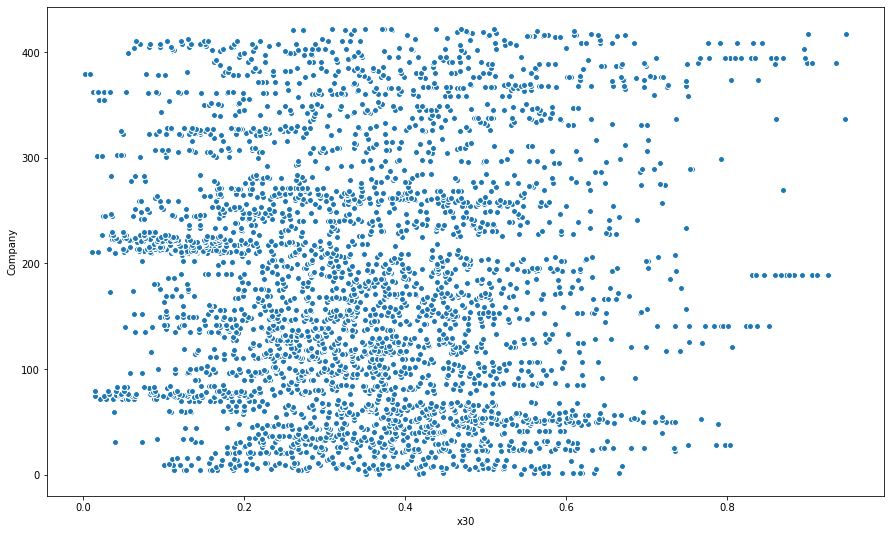

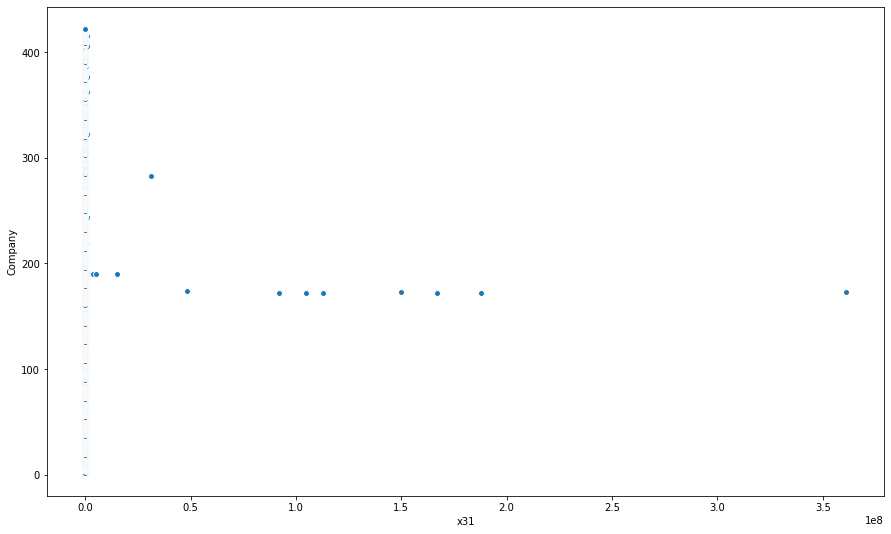

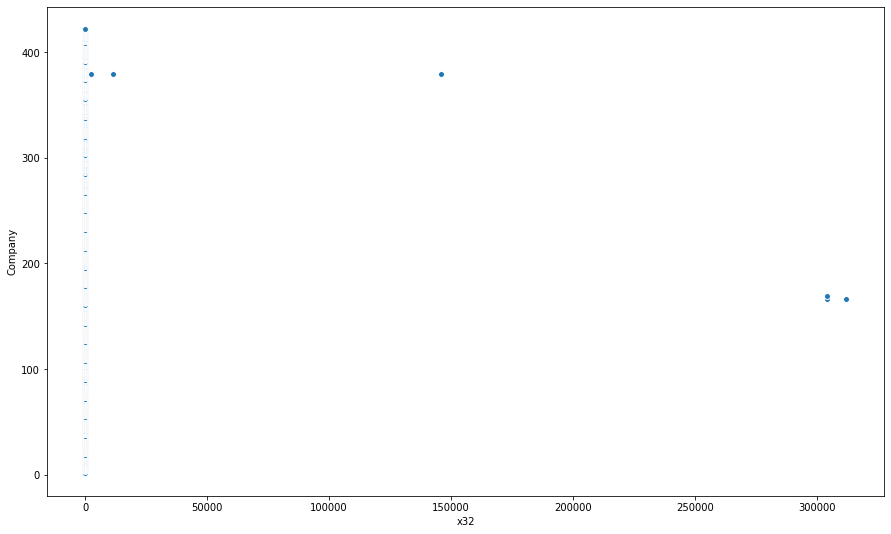

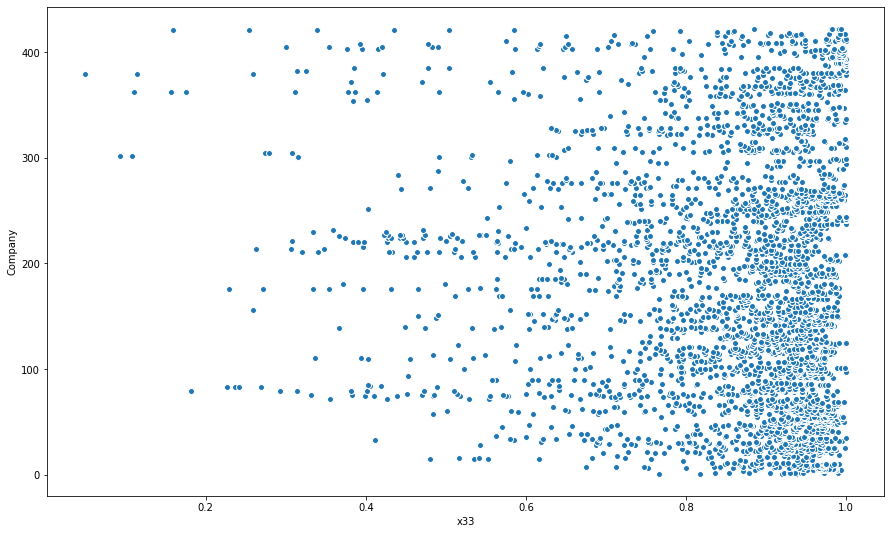

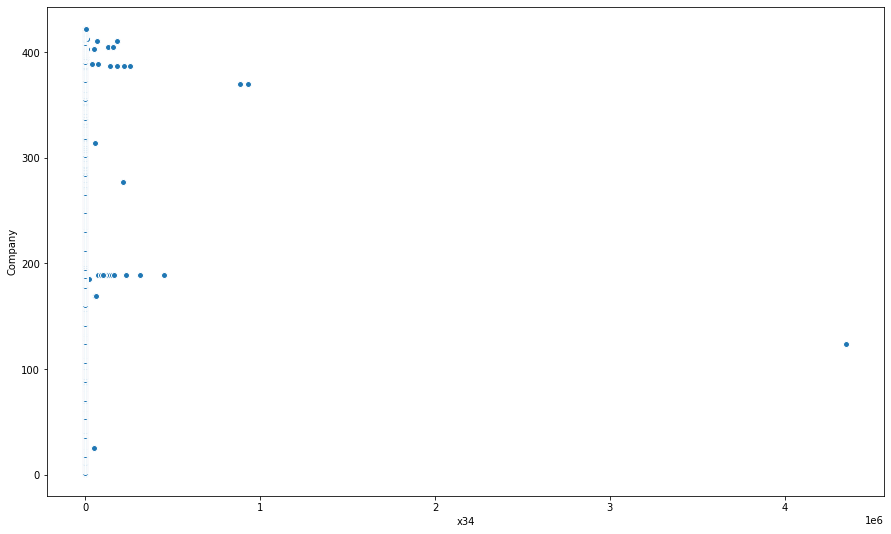

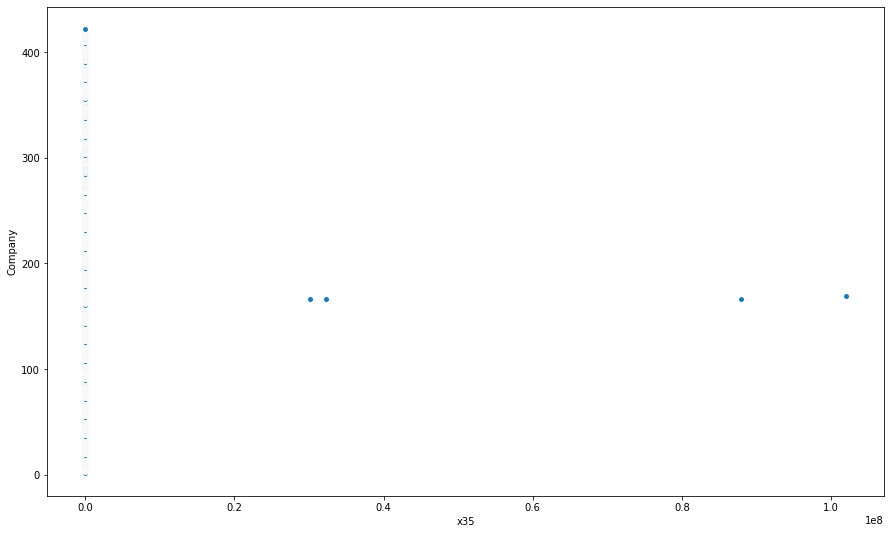

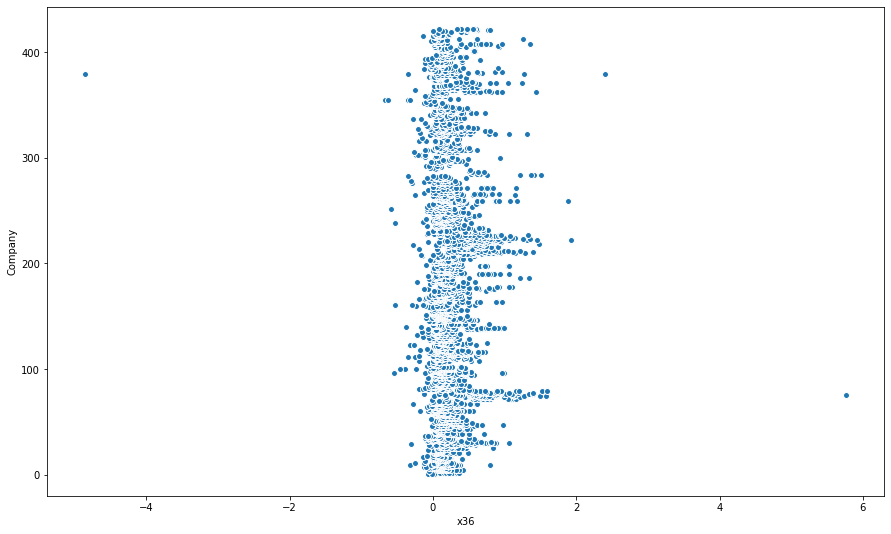

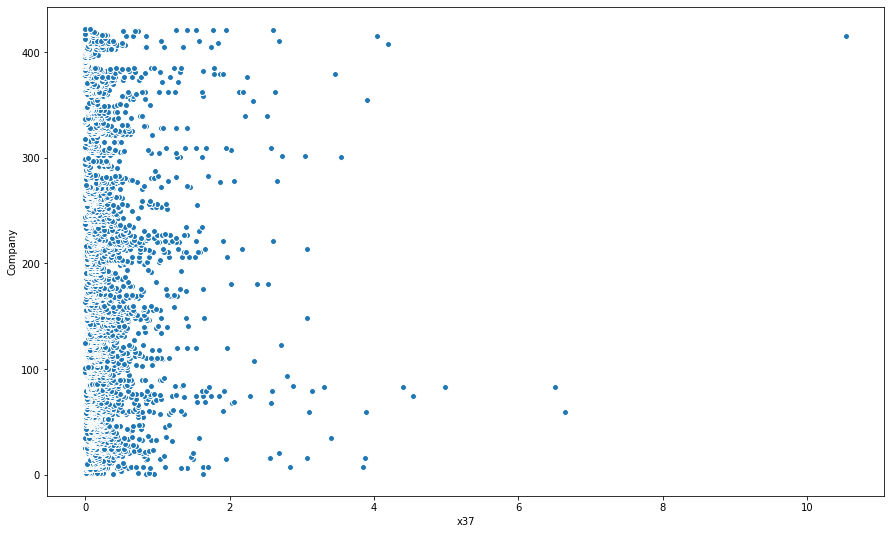

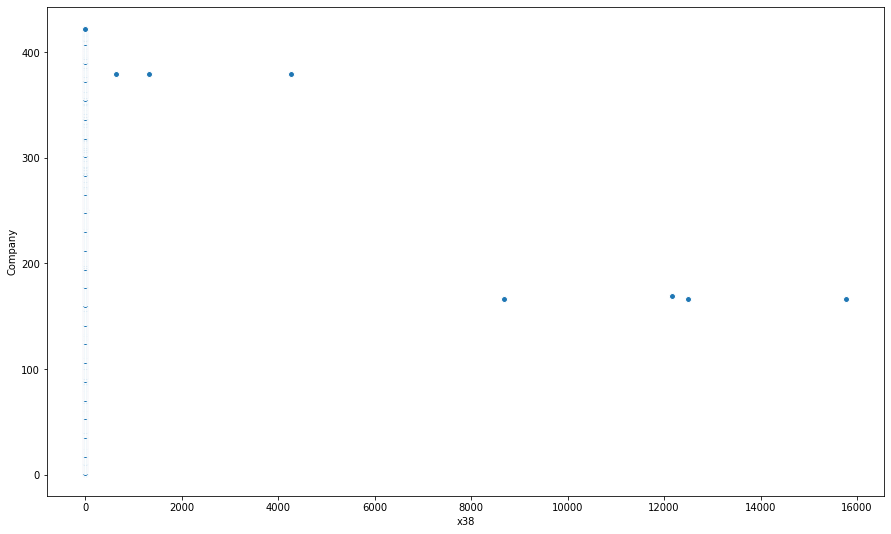

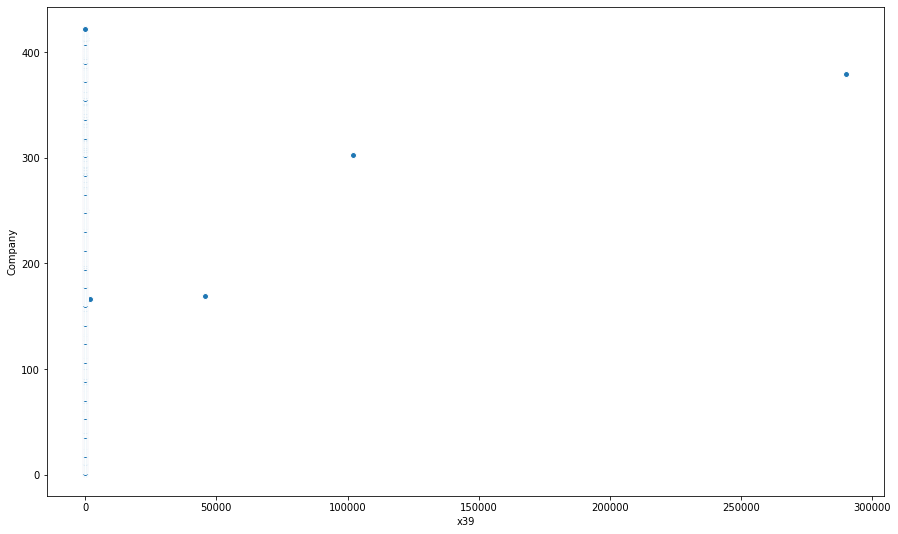

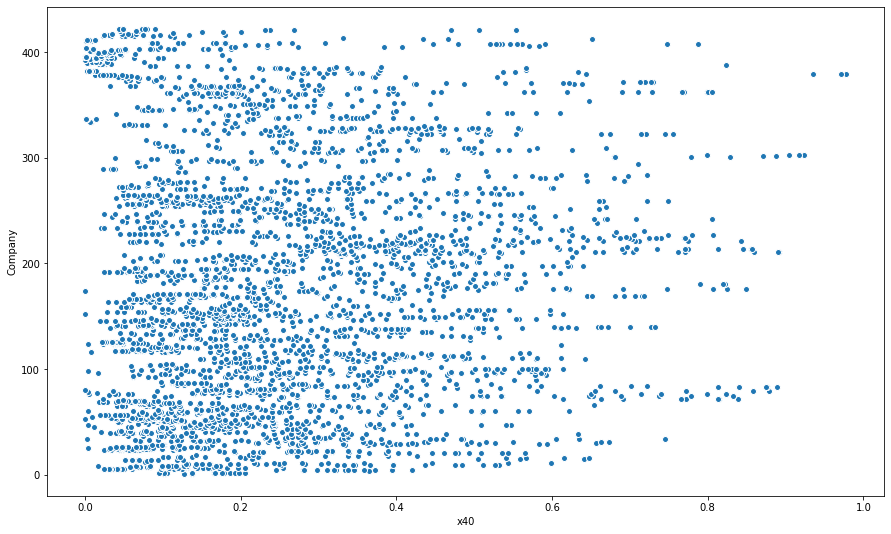

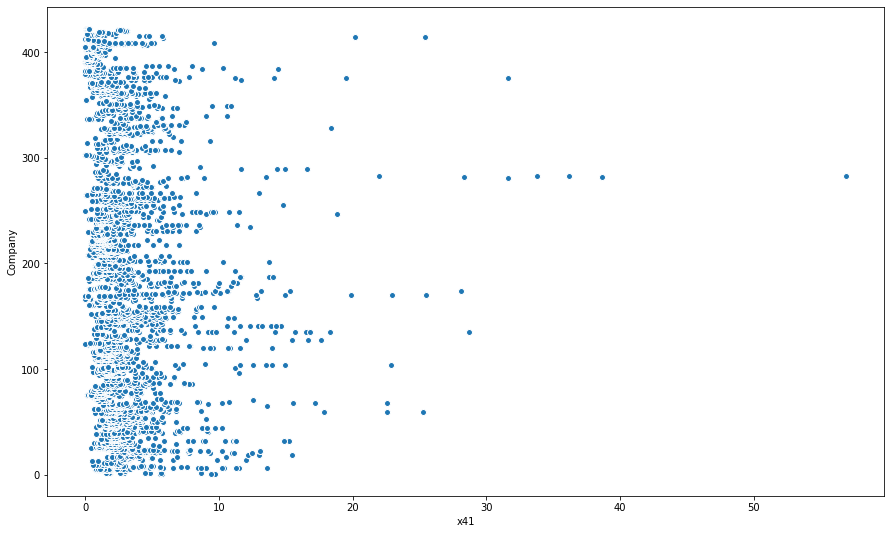

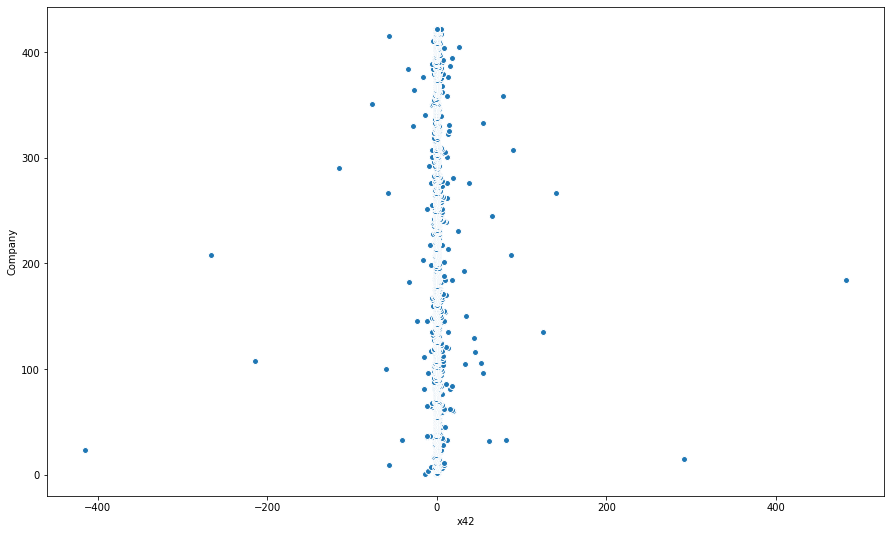

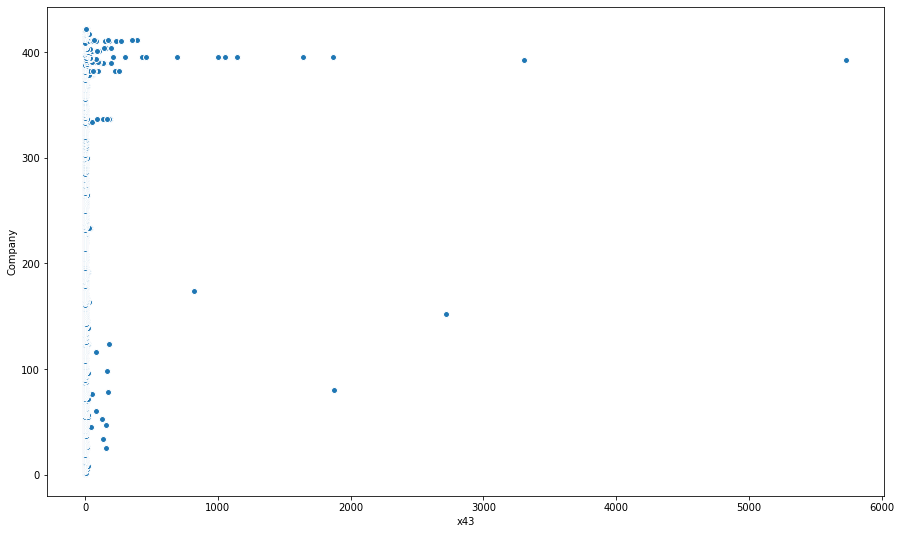

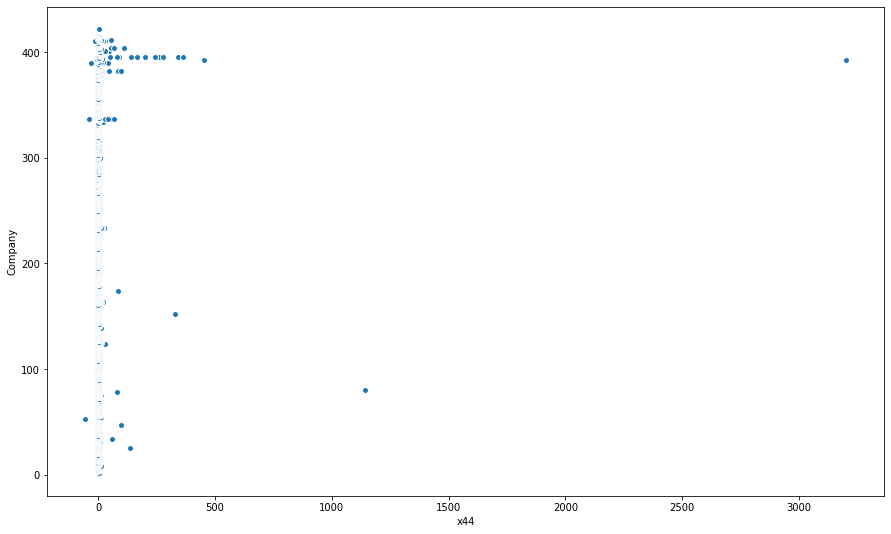

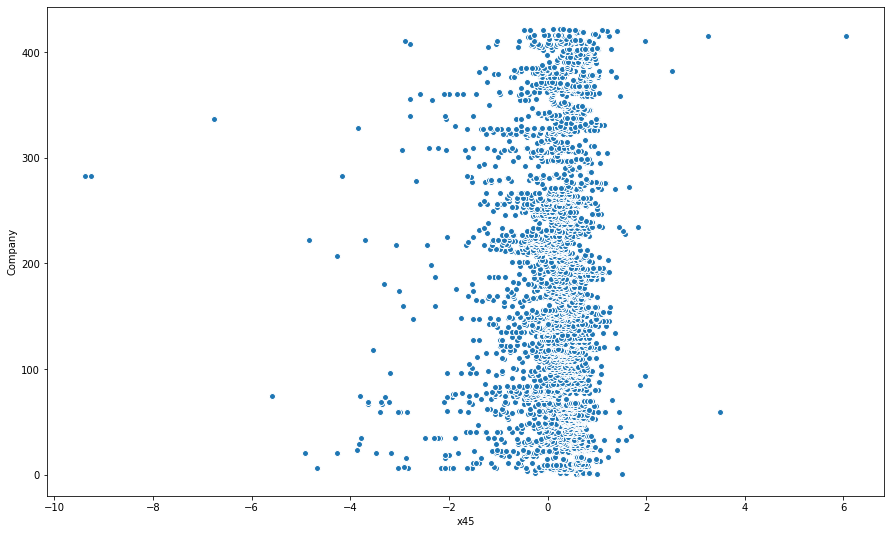

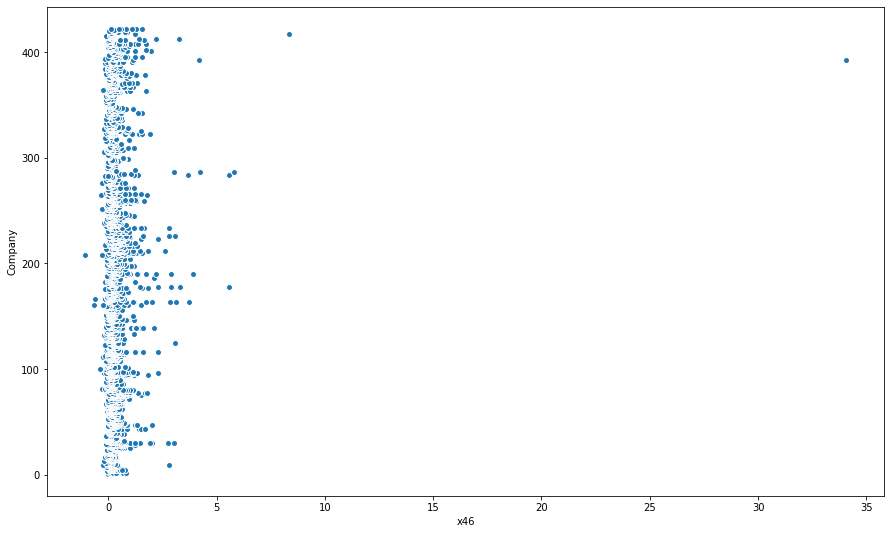

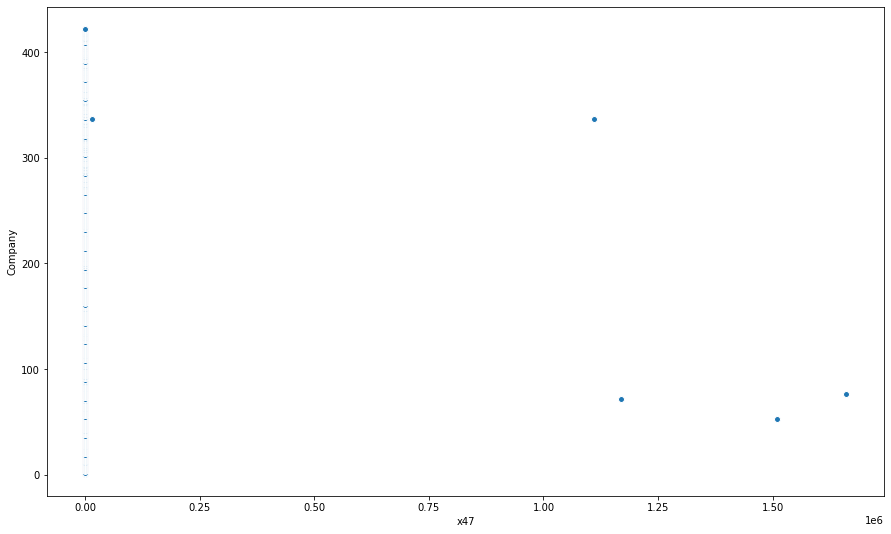

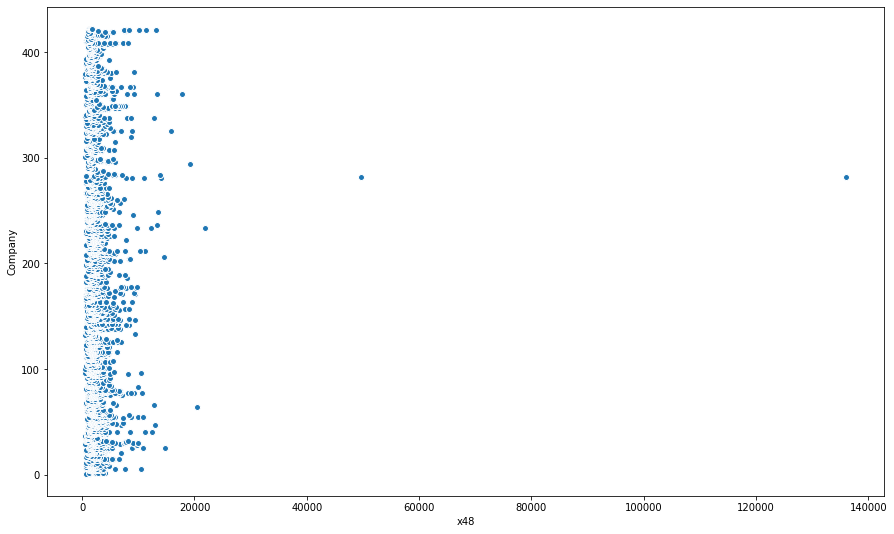

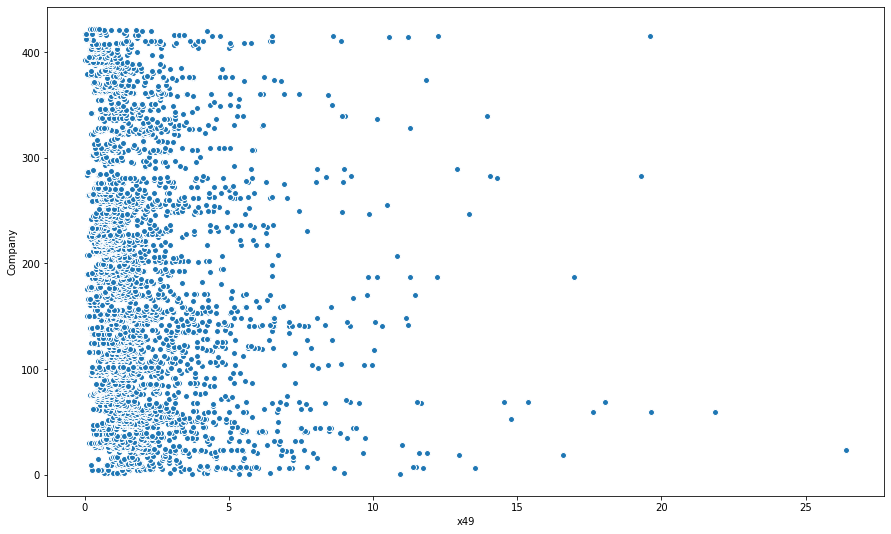

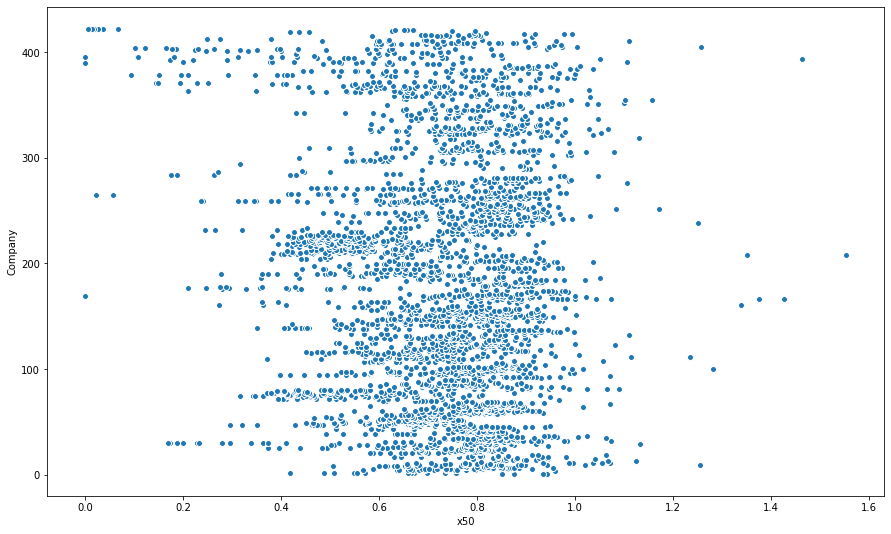

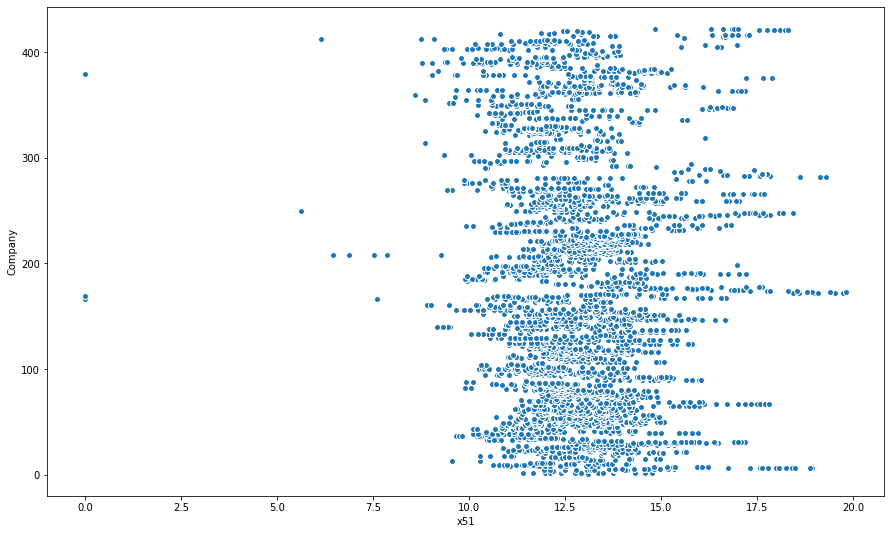

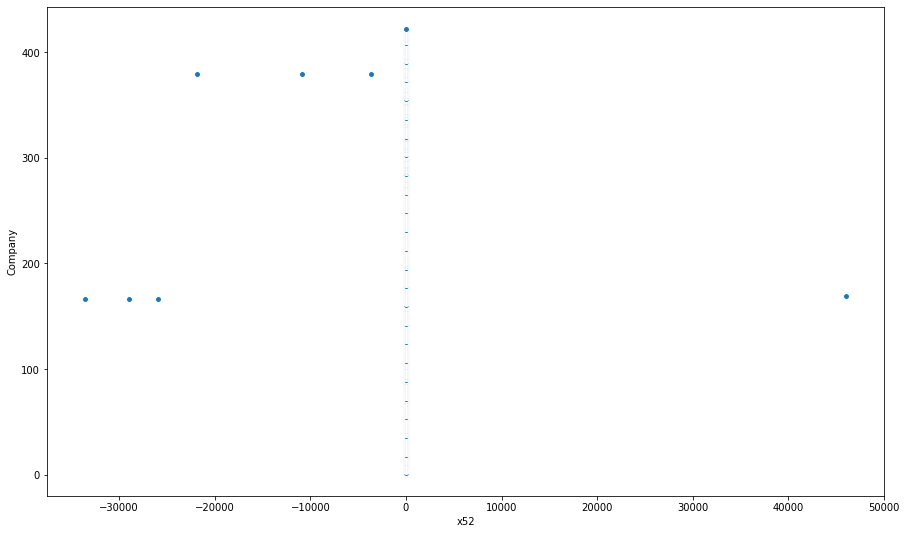

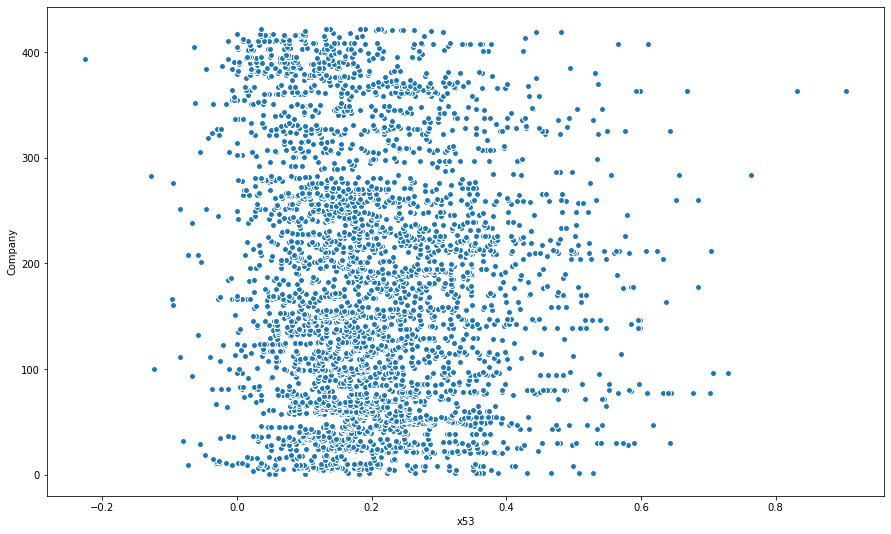

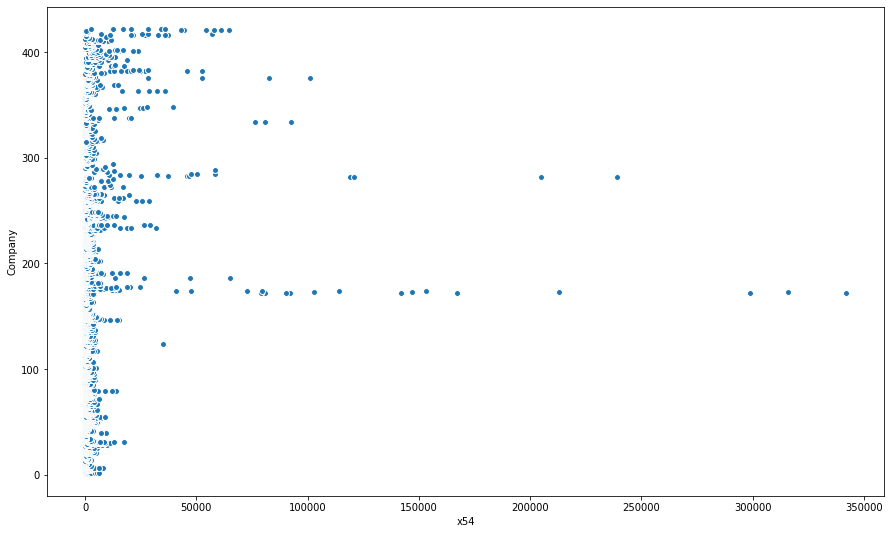

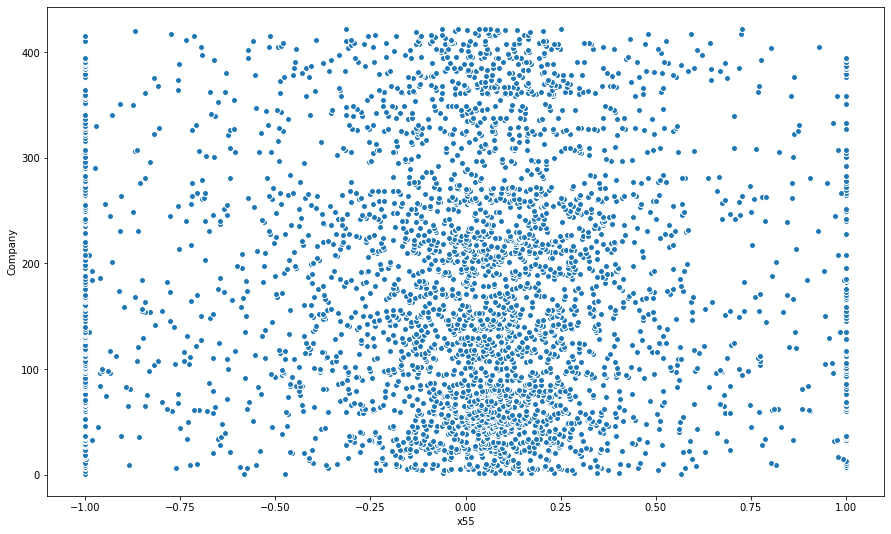

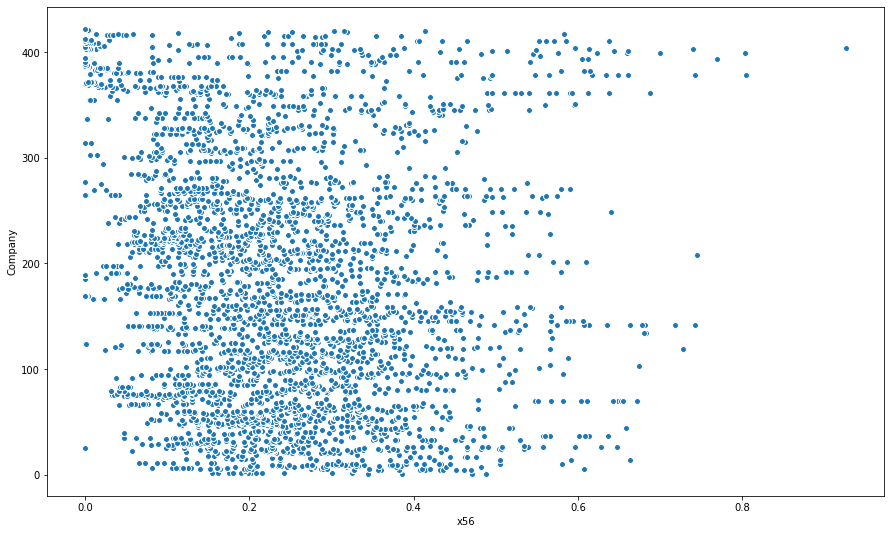

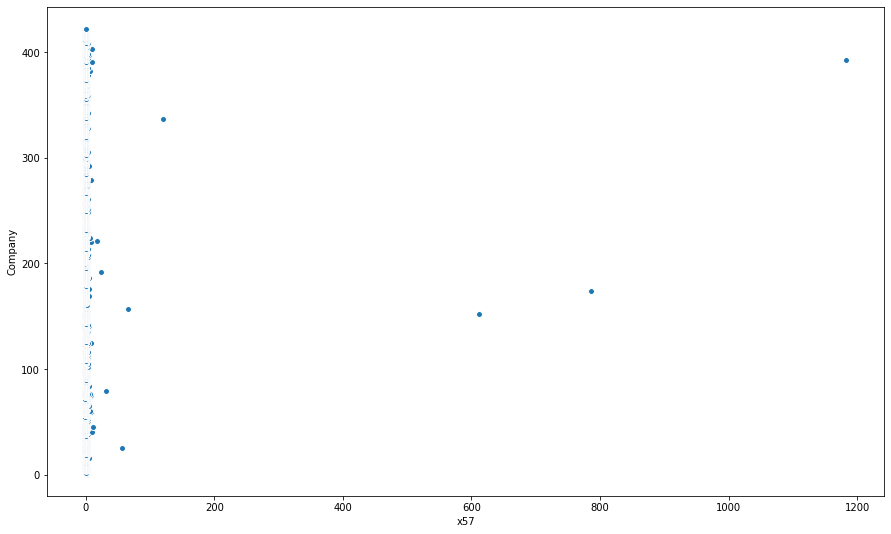

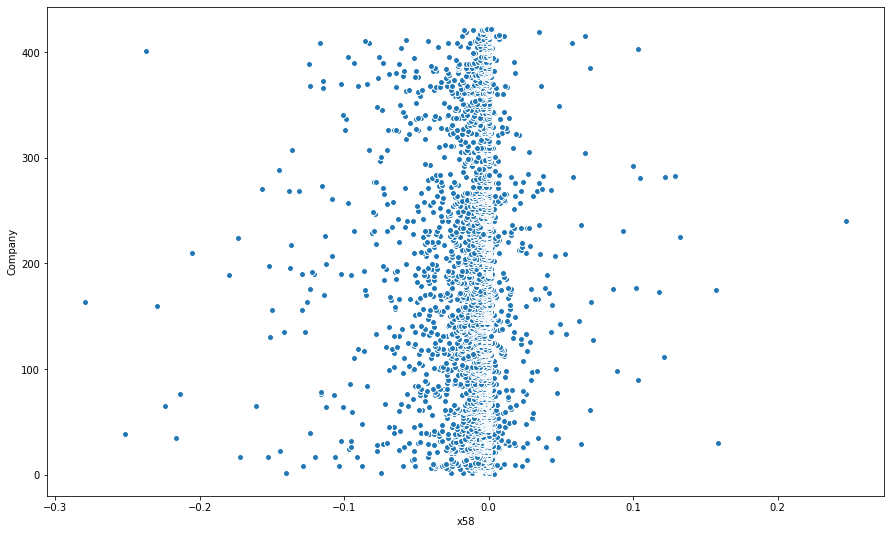

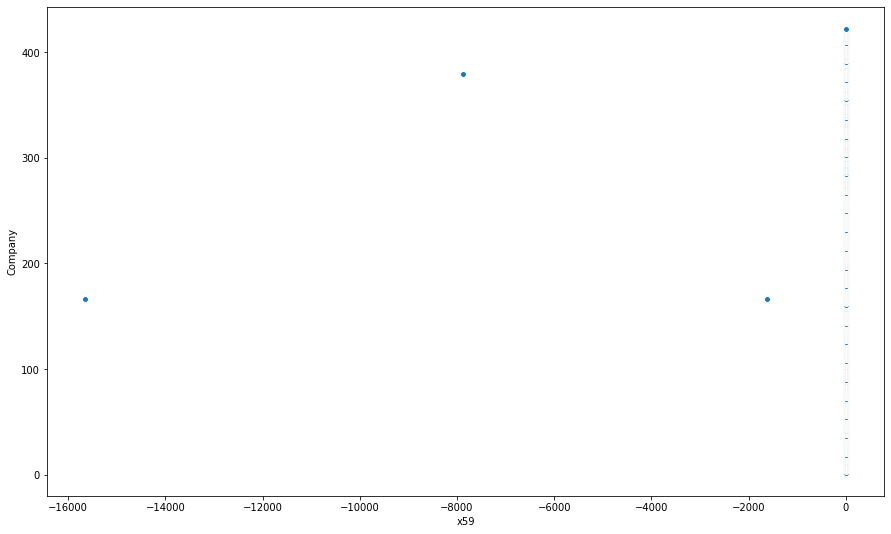

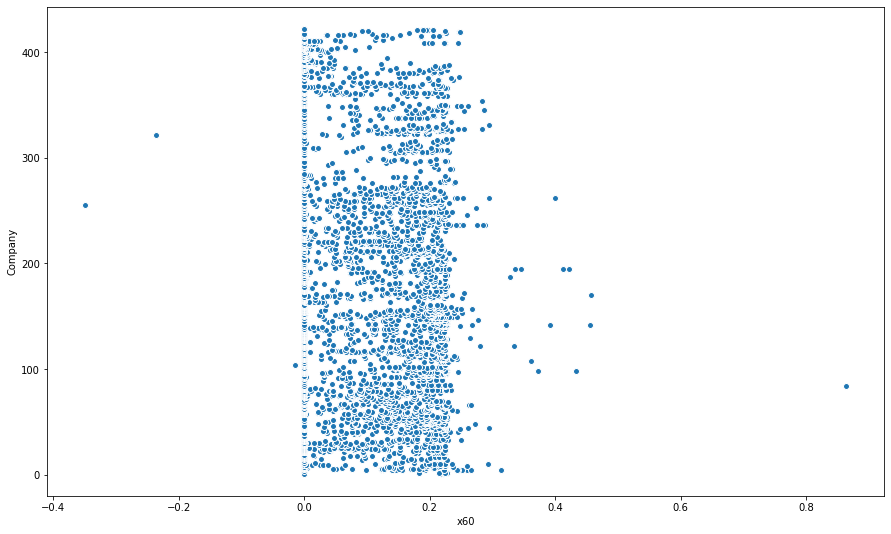

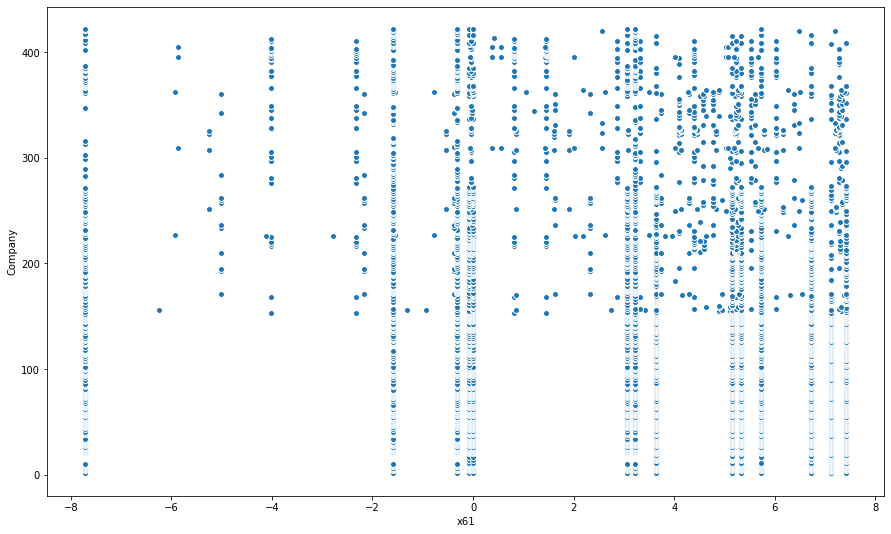

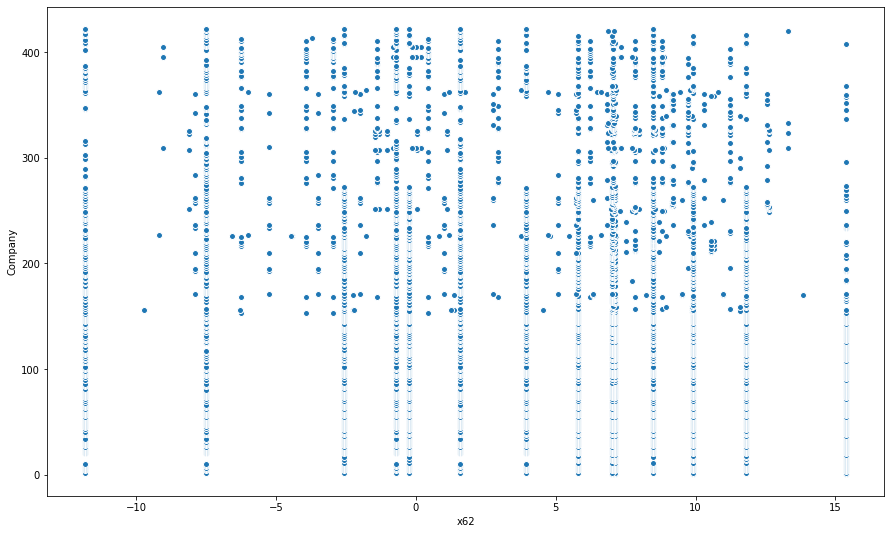

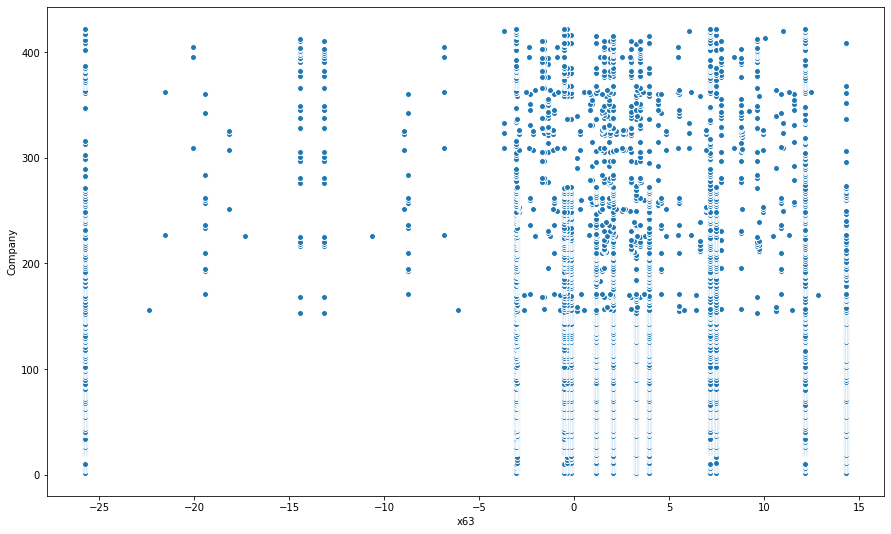

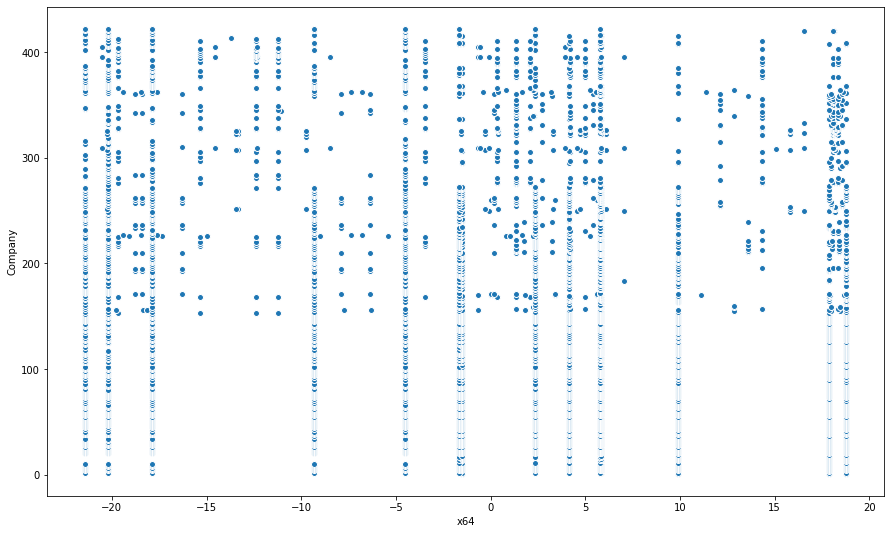

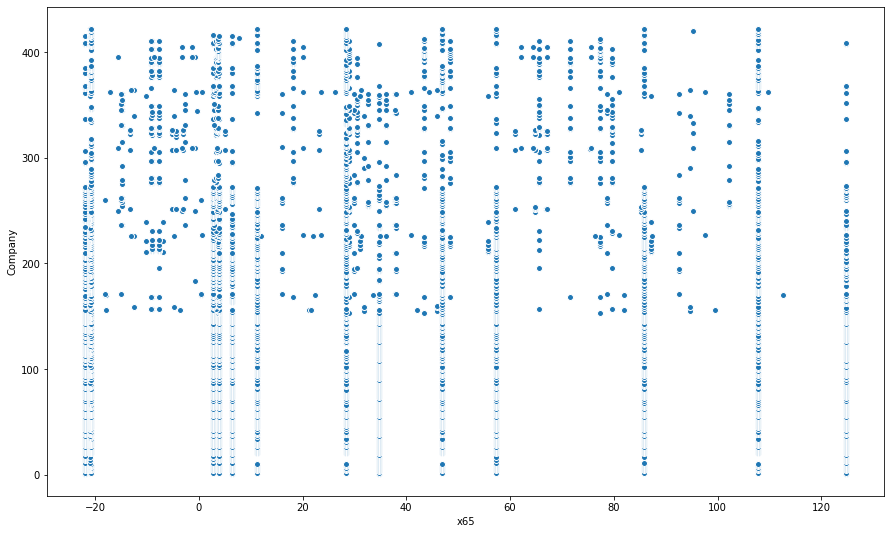

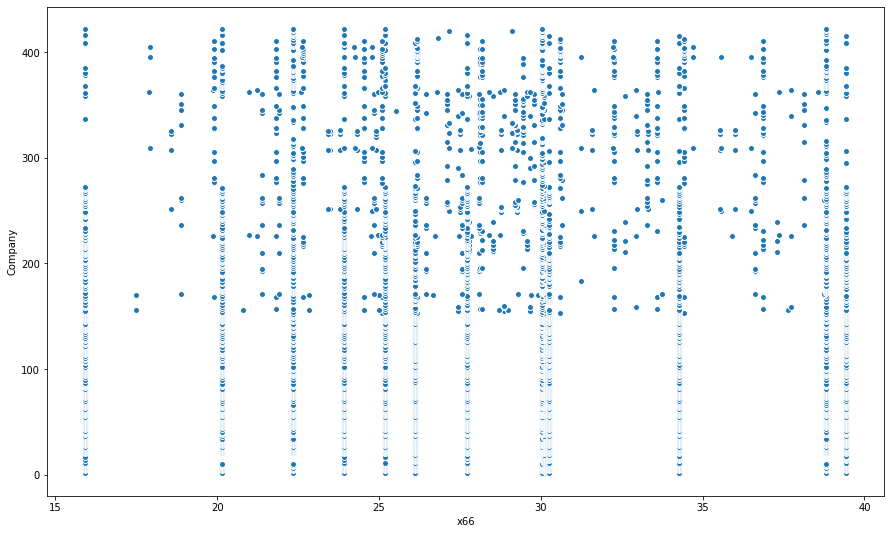

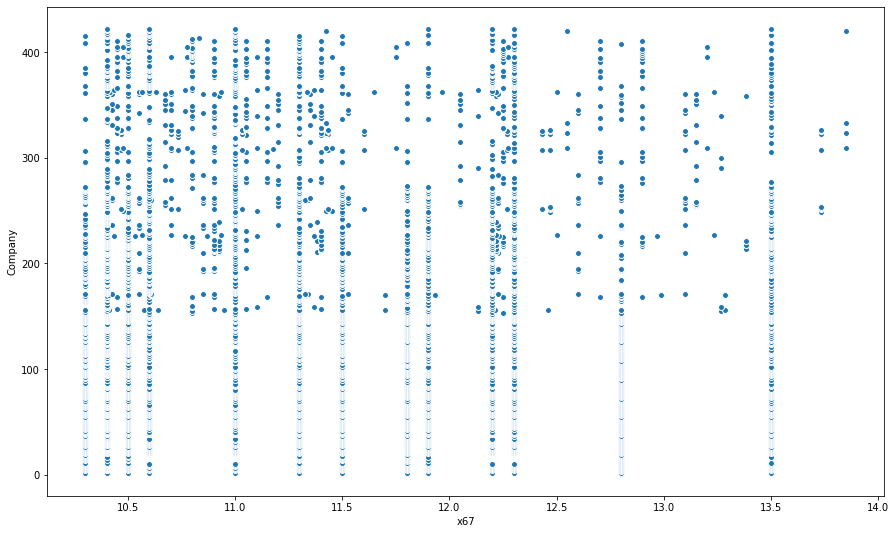

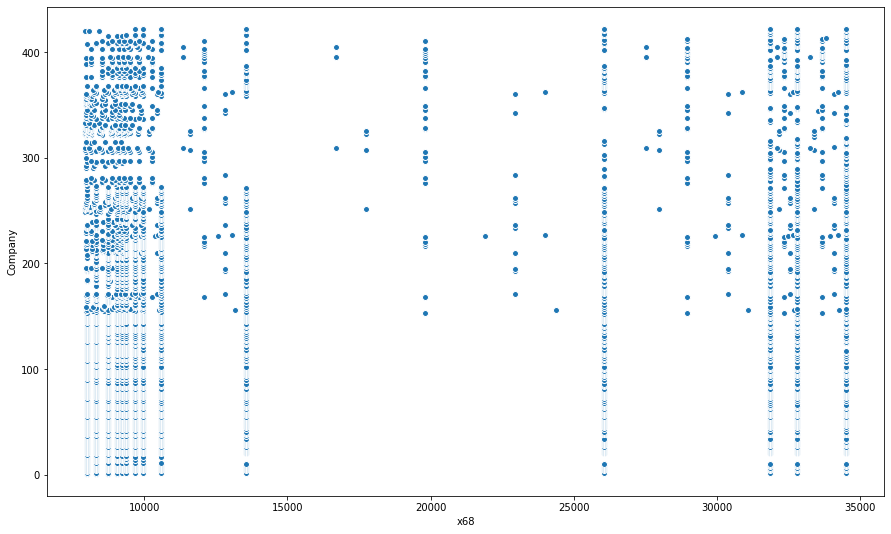

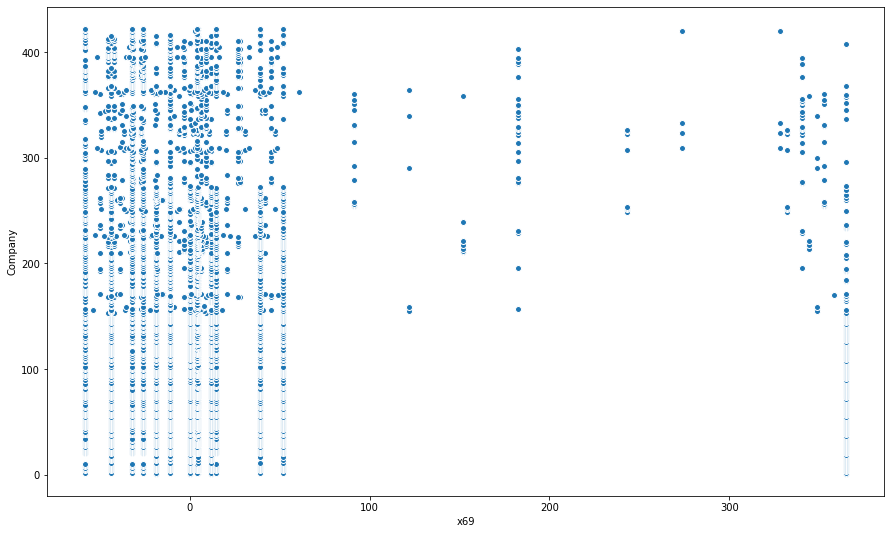

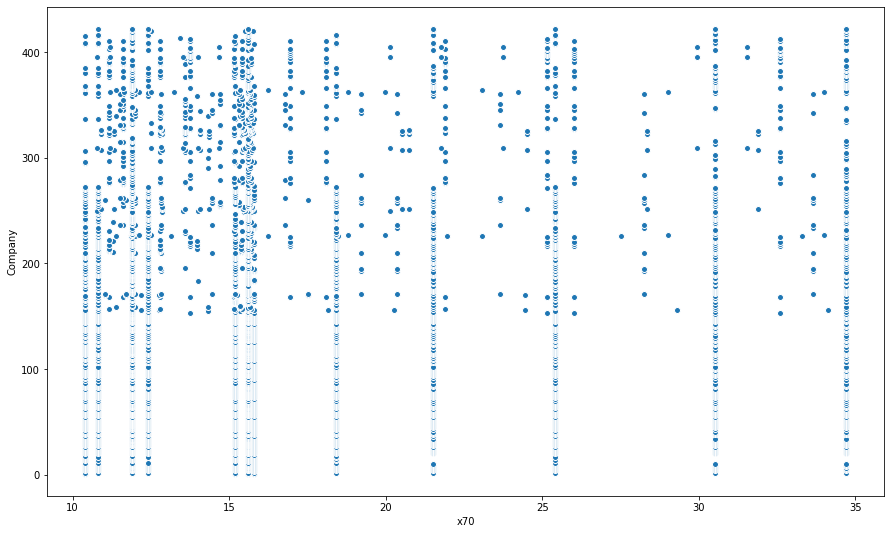

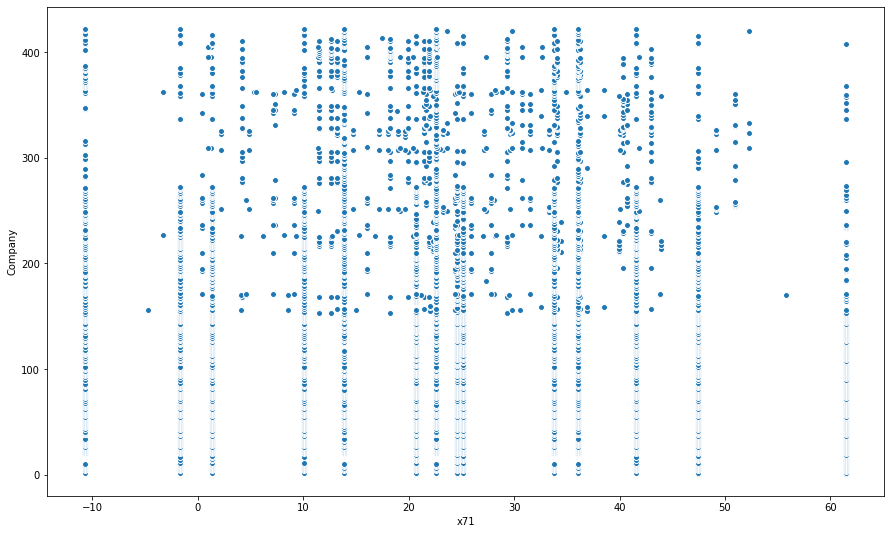

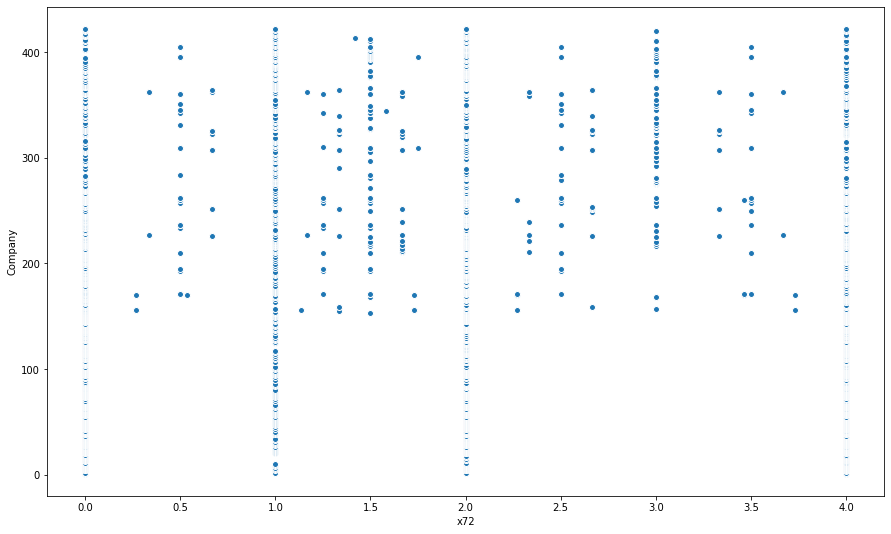

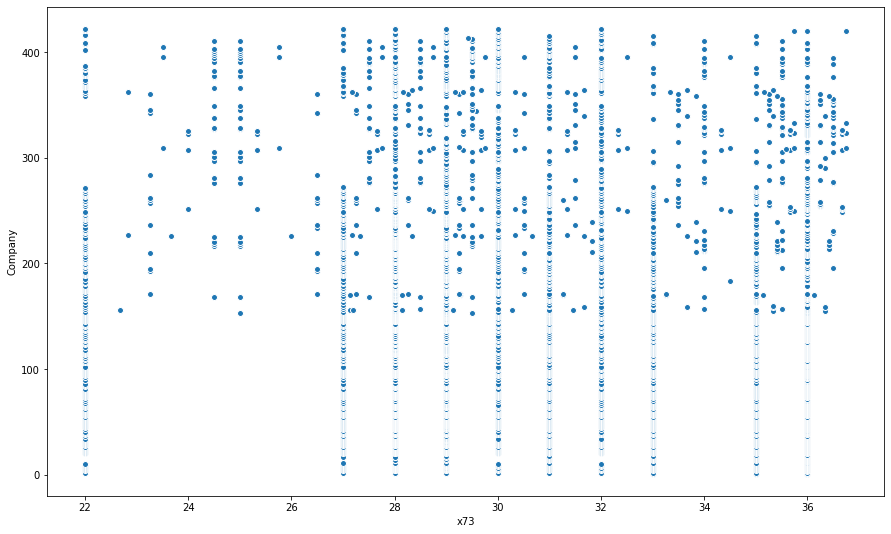

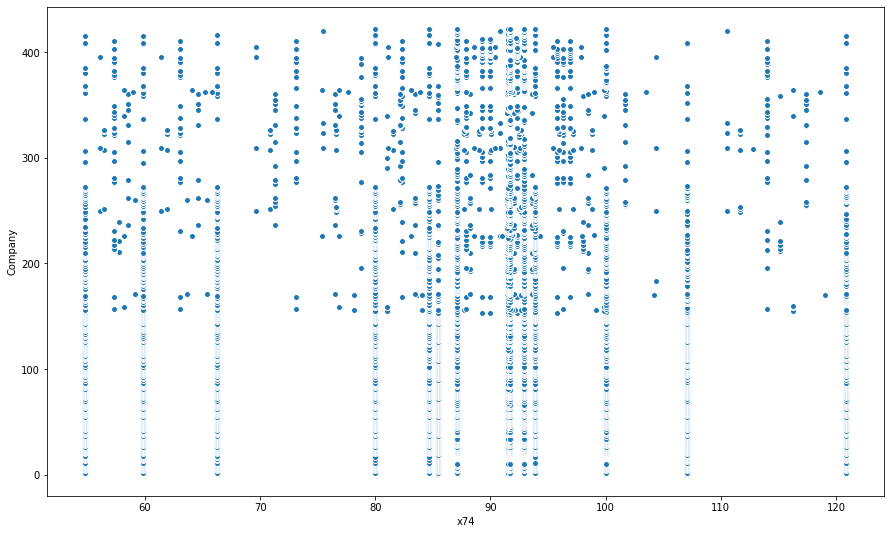

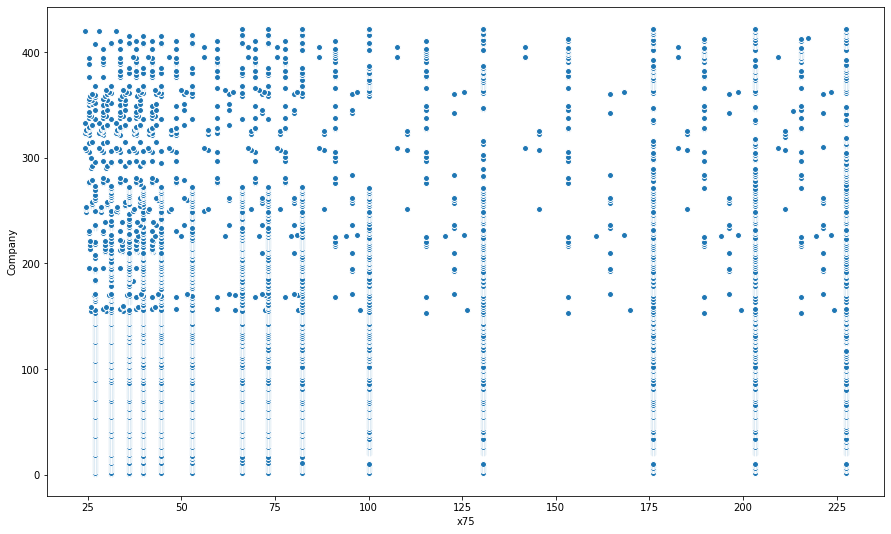

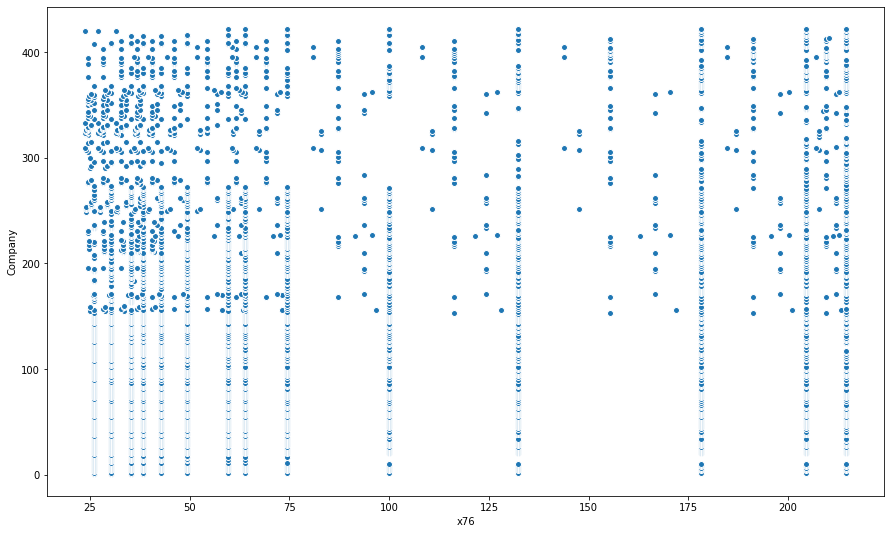

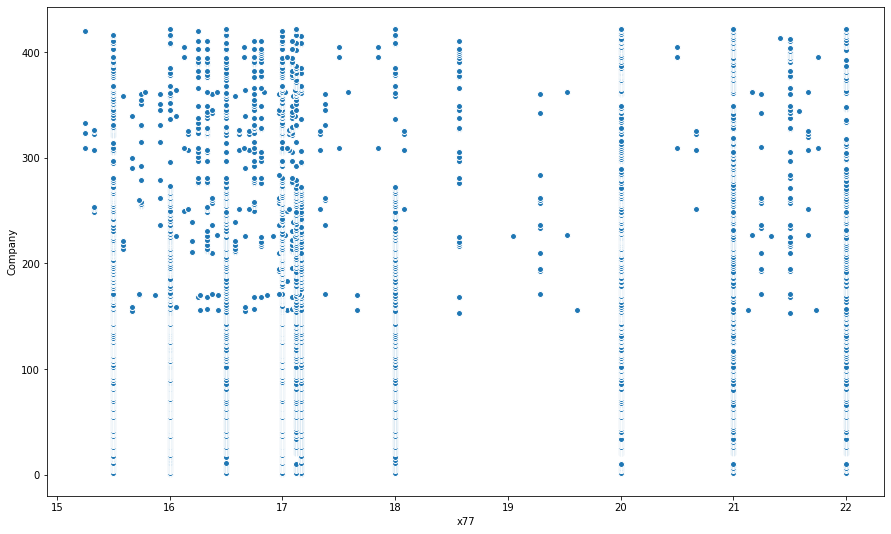

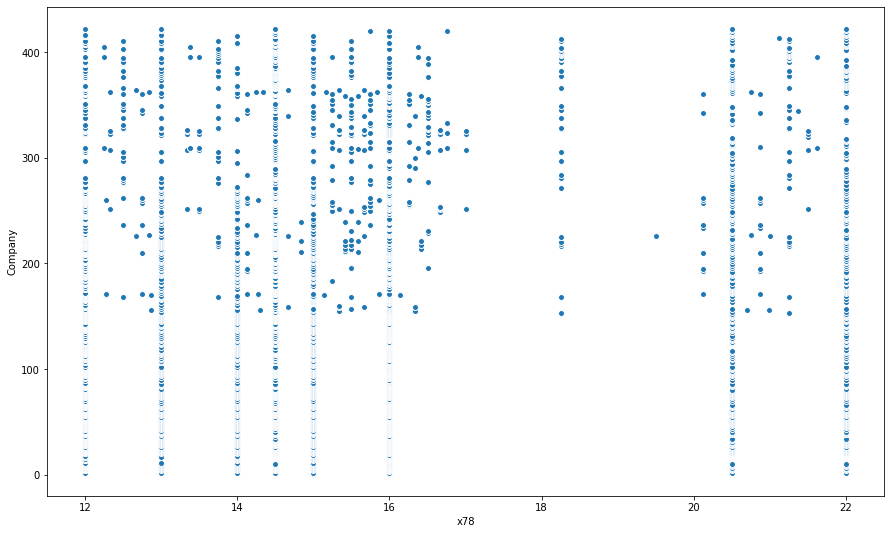

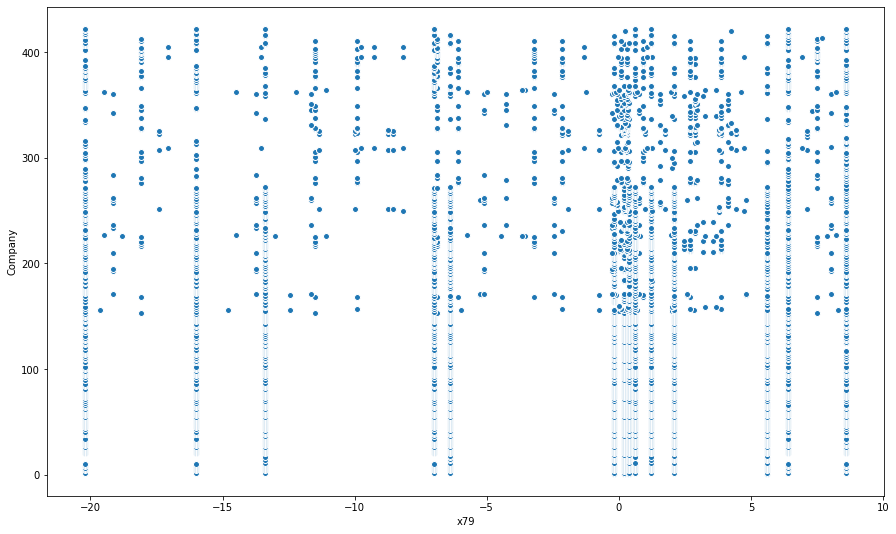

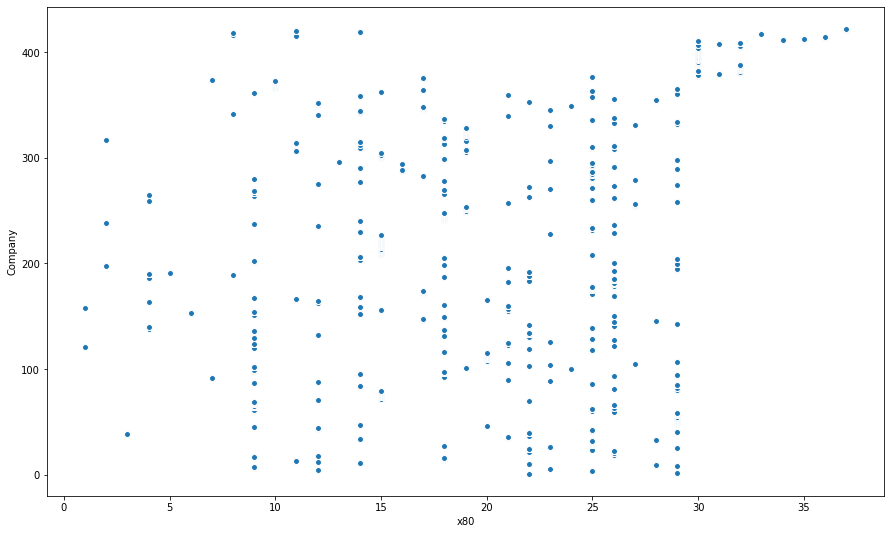

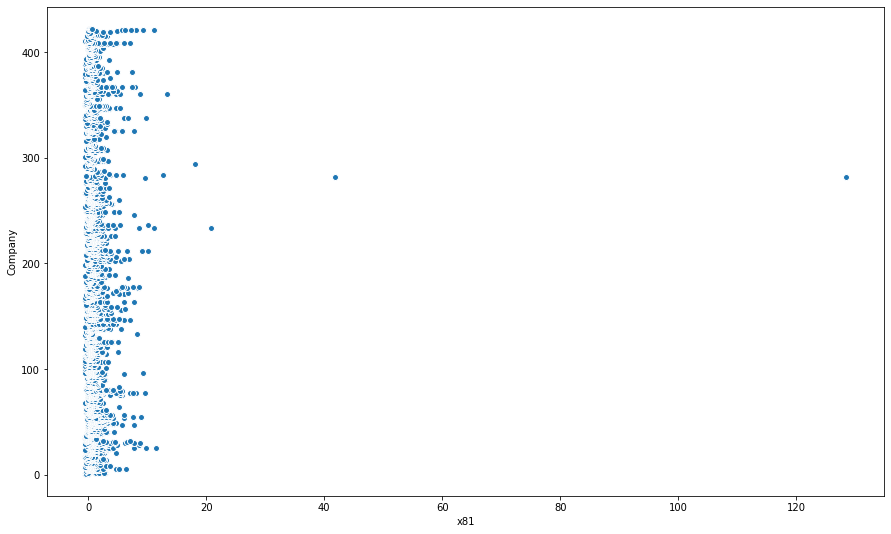

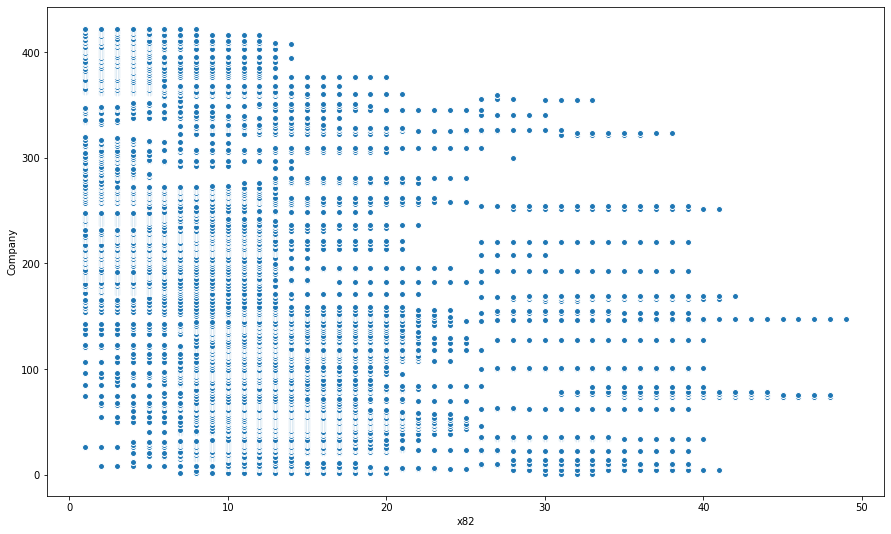

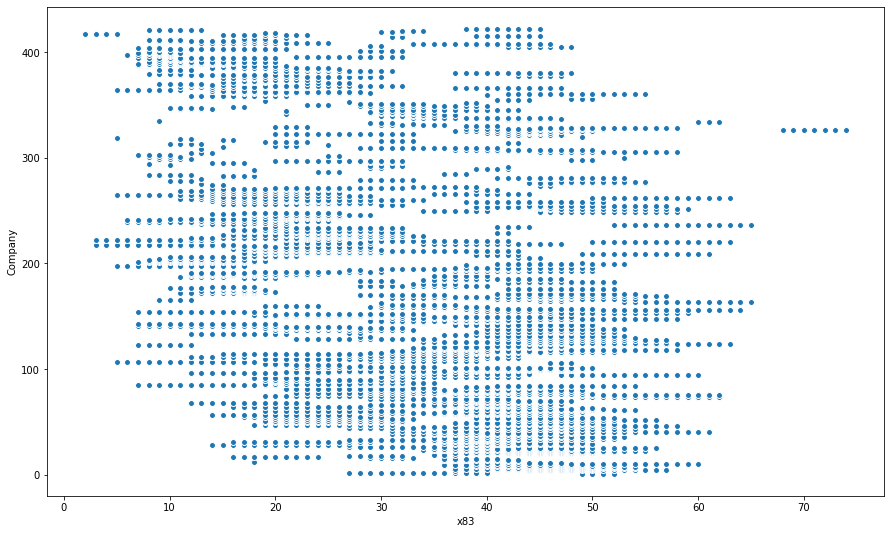

In [22]:
for i in ['Time', 'Financial Distress', 'x1', 'x2', 'x3', 'x4', 'x5',
       'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16',
       'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26',
       'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36',
       'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46',
       'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56',
       'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66',
       'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76',
       'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83']:
    plt.figure(figsize=(15,9))
    sns.scatterplot(y=df.Company,x=df[i],data=df,linewidth=1,)
    plt.show()

In [23]:
import dtale
dtale.show(df)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 86 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             3672 non-null   int64  
 1   Time                3672 non-null   int64  
 2   Financial Distress  3672 non-null   float64
 3   x1                  3672 non-null   float64
 4   x2                  3672 non-null   float64
 5   x3                  3672 non-null   float64
 6   x4                  3672 non-null   float64
 7   x5                  3672 non-null   float64
 8   x6                  3672 non-null   float64
 9   x7                  3672 non-null   float64
 10  x8                  3672 non-null   float64
 11  x9                  3672 non-null   float64
 12  x10                 3672 non-null   float64
 13  x11                 3672 non-null   float64
 14  x12                 3672 non-null   float64
 15  x13                 3672 non-null   float64
 16  x14   

2022-03-05 15:24:33,989 - ERROR    - Exception occurred while processing request: The number of FixedLocator locations (0), usually from a call to set_ticks, does not match the number of ticklabels (86).
Traceback (most recent call last):
  File "C:\Users\SR COMPUTER\anaconda3\lib\site-packages\dtale\views.py", line 114, in _handle_exceptions
    return func(*args, **kwargs)
  File "C:\Users\SR COMPUTER\anaconda3\lib\site-packages\dtale\views.py", line 3526, in build_missingno_chart
    figure = msno.bar(df)
  File "C:\Users\SR COMPUTER\anaconda3\lib\site-packages\missingno\missingno.py", line 266, in bar
    ax3.set_xticklabels(nullity_counts.values, fontsize=fontsize, rotation=45, ha='left')
  File "C:\Users\SR COMPUTER\anaconda3\lib\site-packages\matplotlib\axes\_base.py", line 75, in wrapper
    return get_method(self)(*args, **kwargs)
  File "C:\Users\SR COMPUTER\anaconda3\lib\site-packages\matplotlib\axis.py", line 1798, in _set_ticklabels
    return self.set_ticklabels(labels, m

Exception occurred while processing request: Operators do not have the same amount of parts! Please select a new operator with equal rows in each group.
NoneType: None


2022-03-05 15:25:34,870 - ERROR    - Exception occurred while processing request: Operators do not have the same amount of parts! Please select a new operator with equal rows in each group.
NoneType: None


Exception occurred while processing request: Operators do not have the same amount of parts! Please select a new operator with equal rows in each group.
NoneType: None


2022-03-05 15:25:38,036 - ERROR    - Exception occurred while processing request: Operators do not have the same amount of parts! Please select a new operator with equal rows in each group.
NoneType: None
